In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

import seaborn as sns
sns.set()

import scipy
import scipy.stats as stats
from scipy.stats import chi2
from scipy.stats import chi2_contingency

In [5]:
noms_foule_df = pd.read_csv("names-crowd_data.csv", sep=";", encoding="latin1")

In [6]:
# Using markdown while displaying the CSV output
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [7]:
import re
# Functions to highlight selected terms while displaying the CSV output
def bold_type(match):
    return("__" + match.group() + "__")

def highlight_lex(string):
    p = re.compile(r"\b(vulgus|vulgum|vulgi|vulgo|turba|turbam|turbae|multitudo|multitudinem|multitudinis|multitudine)(que|ve)?\b", re.I)
    return p.sub(bold_type, string)

def highlight_esse(string):
    p = re.compile(r"\b(est|fuit|fuerat|erat|fuerit|erit|esse|fuisse|sit|fuisset)(que|ve)?\b", re.I)
    return p.sub(bold_type, string)

In [8]:
# Number of words in each Tacitean subcorpus
nbr_words_ann = 88905
nbr_words_hist = 51495
nbr_words_opusc = 21562

In [9]:
# Chi-squared test functions
def p_value_test(df_index, df_columns):
    data_crosstab = pd.crosstab(df_index, df_columns, margins=True, margins_name="tot")
    z = 0
    pval = 0

    # Chi-squared calculation (z)
    for x in df_columns.unique():
        for y in df_index.unique():
            O = data_crosstab[x][y]
            E = data_crosstab[x]["tot"] * data_crosstab["tot"][y] / data_crosstab["tot"]["tot"]
            z += (O-E)**2/E
     
    
    dof = (len(data_crosstab.columns) -2) * (len(data_crosstab.index) -2)

    pval = 1 - chi2.cdf(z, dof)
    
    printmd("P-value for these variables is __" + str(pval) + "__.")
    
def distribution_p_value(lemma):
    observed_freq = [[((repartition_corpus.lemme == lemma) & (repartition_corpus.oeuvre == "ann")).sum(), nbr_words_ann],
            [((repartition_corpus.lemme == lemma) & (repartition_corpus.oeuvre == "hist")).sum(), nbr_words_hist],
           [((repartition_corpus.lemme == lemma) & (repartition_corpus.oeuvre == "opusc")).sum(), nbr_words_opusc]]
    df_base = pd.DataFrame(observed_freq, index = ['Ann', 'Hist', 'opusc'], columns = ['occ', 'n-occ'])

    df_observed = df_base.copy()
    df_observed.loc["column_total"] = df_observed.sum(axis=0)
    df_observed.loc[:, "row_total"] = df_observed.sum(axis=1)

    for x in df_observed.columns:
        df_observed[x] = pd.to_numeric(df_observed[x], downcast="float")

    df_expected = df_observed.copy()
    tot = df_observed["row_total"]["column_total"]

    for x in df_expected.index[0:-1]:
        for y in df_expected.columns[0:-1]:
            v = (((df_observed.at[x, "row_total"]) * (df_observed.at["column_total", y]))/tot).round(4) 
            df_expected.at[x,y] = float(v)

    df_expected = df_expected.iloc[[0, 1, 2], [0, 1]]

    tstat = np.sum(((df_base - df_expected)**2 / df_expected).values)

    dof = (len(df_base.columns) -1) * (len(df_base.index) -1)

    pval = 1-chi2.cdf(tstat, dof)

    return pval

# The Nameless Crowds: Using Quantitative Data and Digital Tools to Study the Ancient Vocabulary of the Crowd in Tacitus

### Louis Autin [![orcid](https://orcid.org/sites/default/files/images/orcid_16x16.png)](https://orcid.org/0000-0002-1716-1236) 
Sorbonne-Université, UFR de latin

[![cc-by-nc-nd](https://licensebuttons.net/l/by-nc-nd/4.0/88x31.png)](https://creativecommons.org/licenses/by-nc-nd/4.0/) 
© Louis Autin. Published by De Gruyter in cooperation with the University of Luxembourg Centre for Contemporary and Digital History. This is an Open Access article distributed under the terms of the [Creative Commons Attribution License CC-BY-NC-ND](https://creativecommons.org/licenses/by-nc-nd/4.0/)


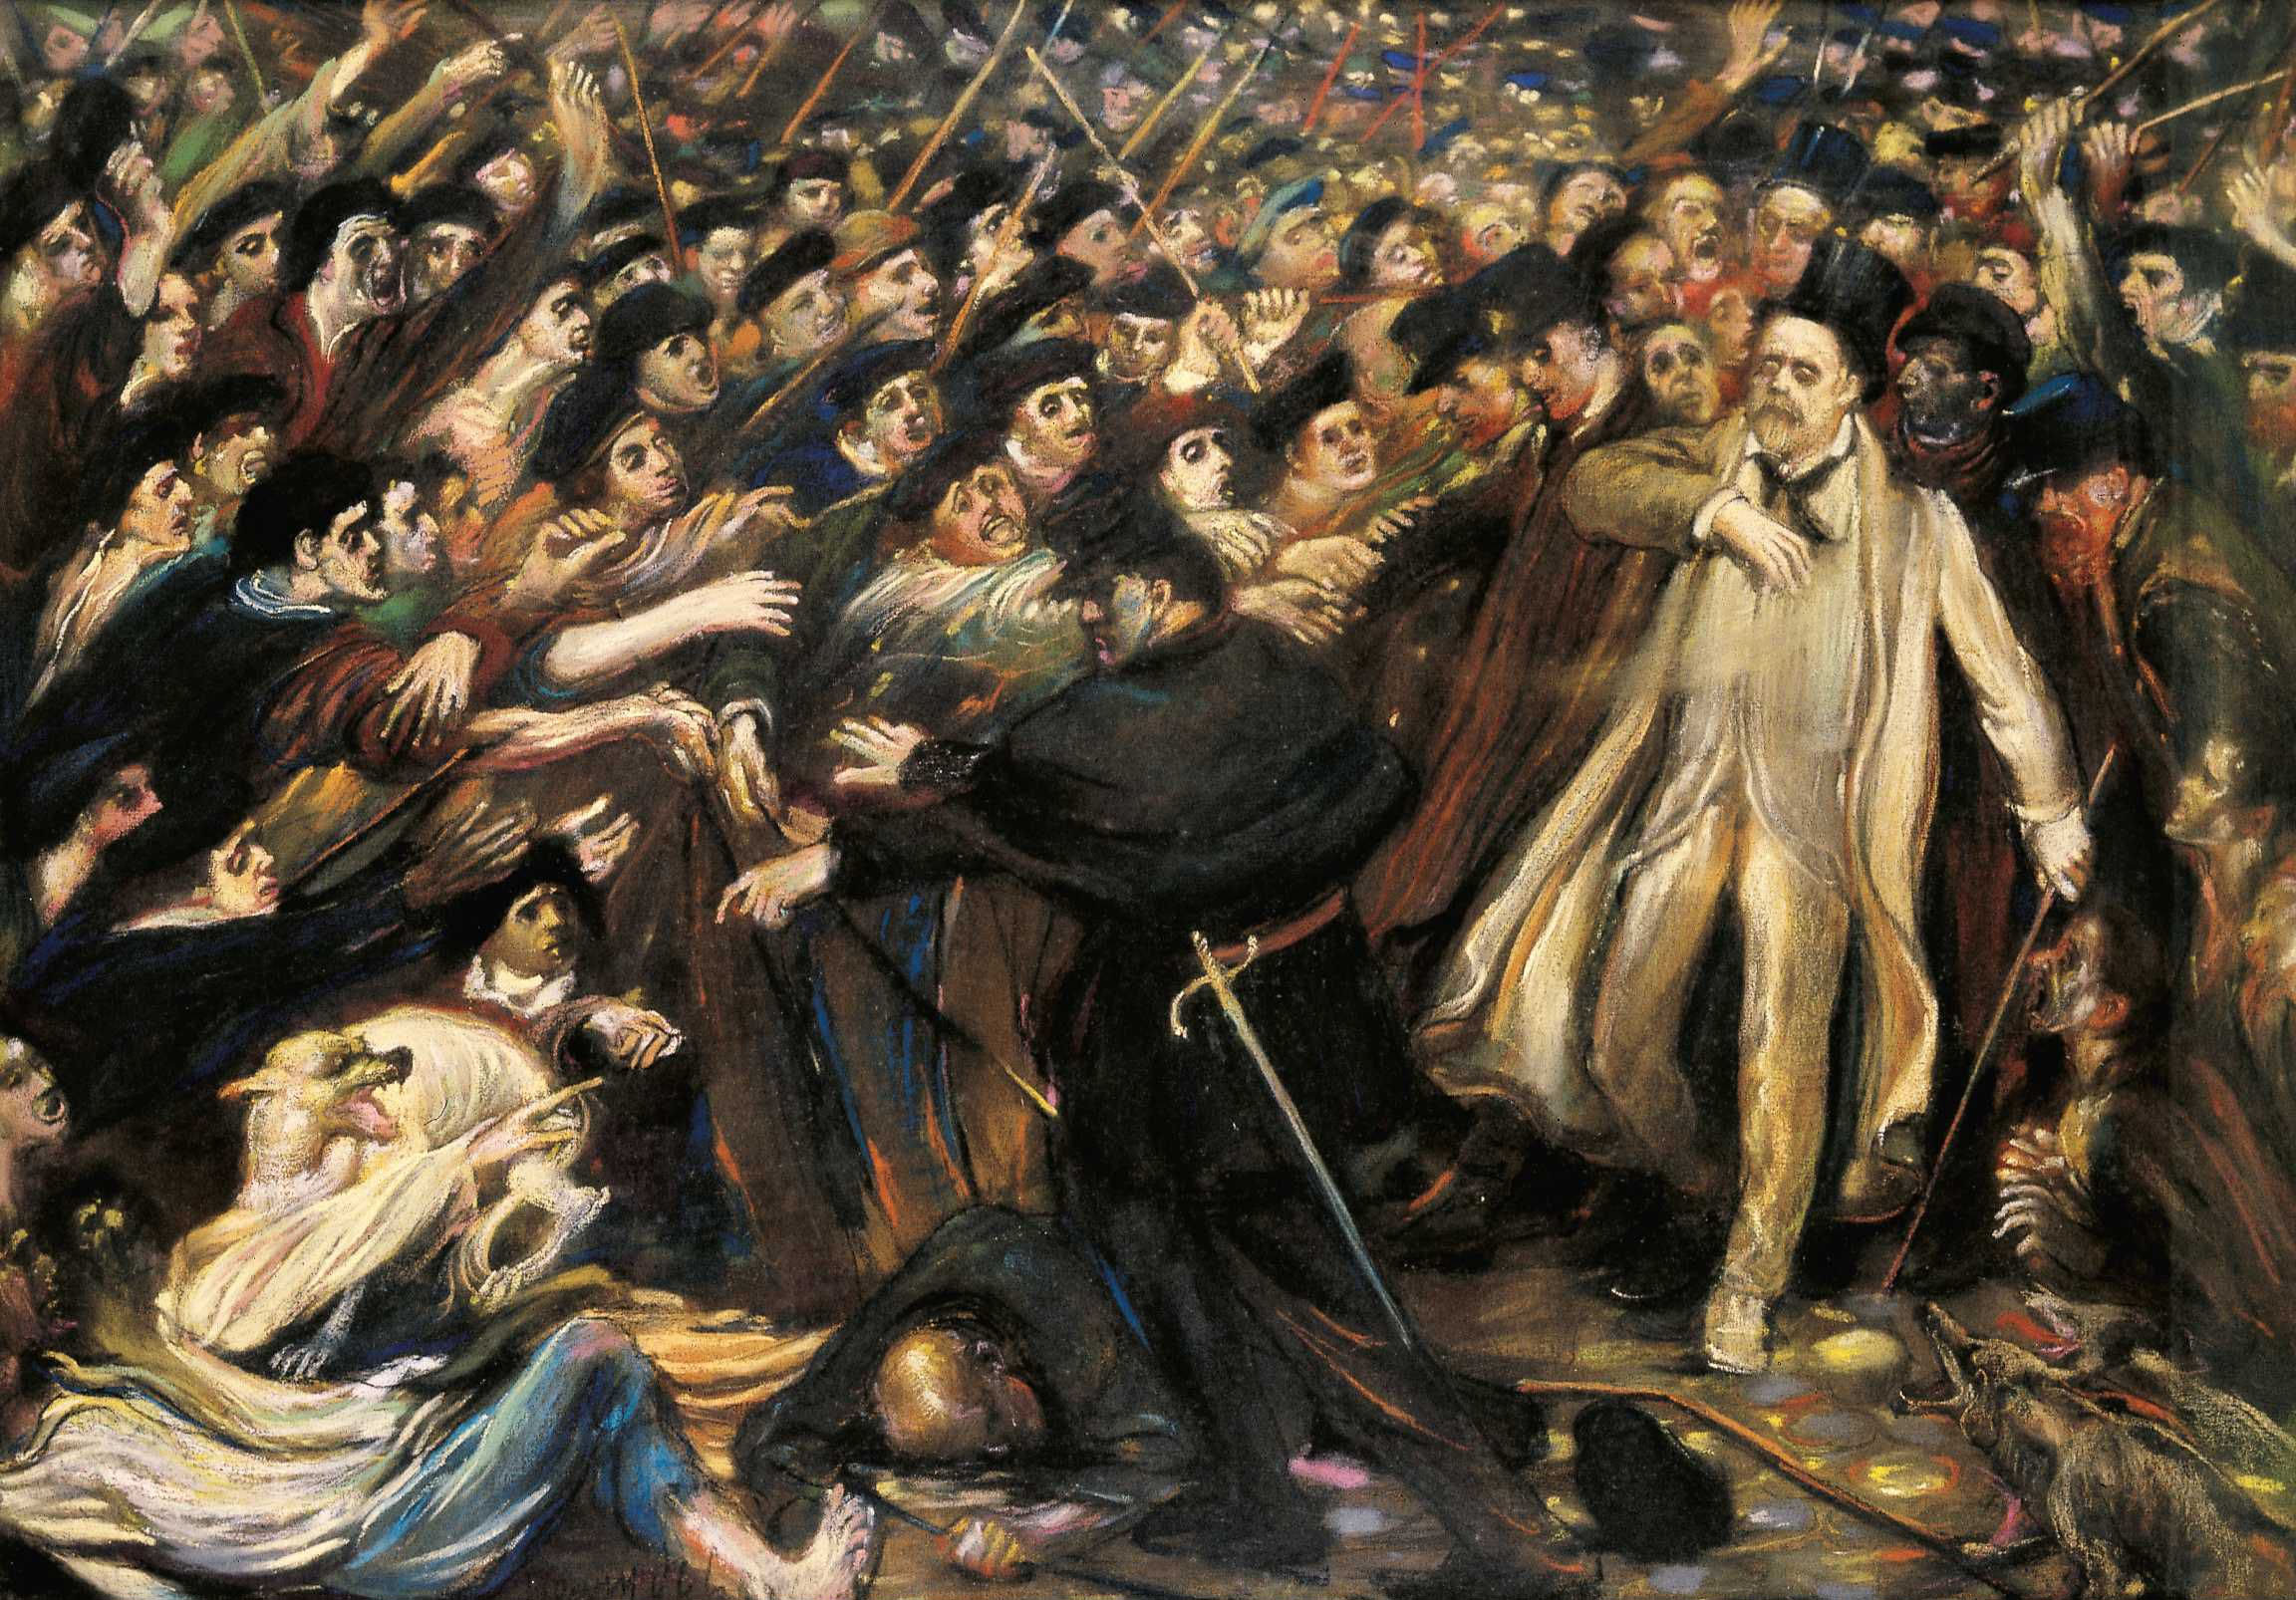

In [10]:
from IPython.display import Image

display(Image("Zola_sortie.jpg"))

Crowds, Tacitus, Lexicology, Phraseology, Political History, Principate

Combining quantitative and qualitative information, this paper investigates from a lexicological and socio-historical perspective the vocabulary of the crowd in Tacitus, a Roman historian of the 1st-2nd century AD. Unlike most Latin authors, Tacitus uses predominantly the word _vulgus_ in comparison to _turba_, _multitudo_ and the other nouns referring to urban and military crowds. The singularity of the Tacitean _vulgus_ is not only quantitative, but also qualitative, especially when it comes to its semantic nuances and combinatorial profile. Focusing one after the other in a contrastive way on the phenomenological, sociological and ethological dimensions of the crowds depicted by Tacitus, we show that, while _turba_ and _multitudo_ refer to strongly spatialized crowds, whose social composition does not seem to be a strong defining factor, usually without any own opinion or political autonomy, _vulgus_ refers in Tacitus to a “popular” crowd, defined by its ability to vocalize its own feelings and opinion and to engage in dialogue, or even conflict, with the ruling elites. The _vulgus_ thus seems to become, in Tacitus’ narrative, a new political actor of the imperial regime. Contrary to the institutional _populus_, the _vulgus_ as political actor does not express its opinion through the ordinary political institutions that were traditionally controlled by the Roman aristocracy (the _comitia_ for instance), but proceeds to do so through vocalizations in non-institutional (albeit deeply political) contexts.

> Πληθὺν δ᾽ οὐκ ἂν ἐγὼ μυθήσομαι οὐδ᾽ ὀνομήνω, / οὐδ᾽ εἴ μοι δέκα μὲν γλῶσσαι, δέκα δὲ στόματ᾽ εἶεν, / φωνὴ δ᾽ ἄρρηκτος, χάλκεον δέ μοι ἦτορ ἐνείη. (Homer, _Iliad_, 2.488-490)

> « But the multitude I could not tell or name, not even if ten tongues were mine and ten mouths and a voice unwearying, and the heart within me were of bronze. » (Homer. _Iliad_, Volume I: Books 1-12, translated by A. T. Murray, Loeb Classical Library, 1924)

## Introduction

### Crowds in Classics and Ancient History

Crowd behaviour in the Antiquity have received little scholarly attention, even though ancient authors (prose writers as well as poets) very regularly mention mass phenomena. The major works of the last fifty years on the Roman _plebs_, which we owe to <cite data-cite="2272257/43U2KCKU"></cite>, <cite data-cite="2272257/ZRNV65AA"></cite> or <cite data-cite="2272257/CJFMAH9S"></cite>, focus on the political culture of the sub-equestrian segments of Roman society, without centrally examining crowd movements. Few historical studies address head-on the question of the definition of crowds in ancient societies: see some brief assessments in (<cite data-cite="2272257/C6JA85NG"></cite> pp. 7-16, <cite data-cite="2272257/R4D2I72H"></cite> pp. 17-18, or more recently <cite data-cite="2272257/JHK45JAI"></cite>, and on the side of literary studies, the panoramas of <cite data-cite="2272257/83M575BB"></cite> or <cite data-cite="2272257/9HJ9HQUA"></cite> and Engel’s still useful monograph on collective psychology in Tacitus <cite data-cite="2272257/GJAK9283"></cite>. Some insights can be found in studies on close related themes, like R. Ash’s monograph on the behaviour of the legions in Tacitus’ _Histories_ <cite data-cite="2272257/4BAEJ45C"></cite>.

This scarcity can be explained by the little scientific value given to the concept of crowd in historical studies: the notion seems to be irremediably linked to the psychological, not to say "psychopathological", approach that characterized its emergence in the scientific field at the end of the 19th century. The famous studies of Le Bon and Tarde, whose ideological positioning as much as results are unanimously rejected today (cf. <cite data-cite="2272257/7N2TV7TF"></cite>), have cast doubt on the operability of the notions of "crowd" or "mass", which hardly find any echo today elsewhere than in the field of social psychology (see <cite data-cite="2272257/U8PJH2ZE"></cite>). Moreover, scholars working on ancient societies now generally resort to the tools of the history from below, which leave aside the question of group psychology to focus on the social life of actors and the (economic, social, political) motives of collective action: among several examples, see the recent collective publication of the research group [“The Subaltern and the Popular in Antiquity”](http://gsppa.fflch.usp.br/en/presentation, "Link to the project presentation on the University of São Paulo website") with the forthcoming <cite data-cite="2272257/NCMIITUA"></cite>, and, on our topic, but on a later period, the recent thorough analysis of <cite data-cite="2272257/5PDRBT4Y"></cite>.

This relative lack of interest is often accompanied by a distrust of the vocabulary of ancient authors. The well-known aristocratic bias of our sources often leads to the rejection of any in-depth study of the vocabulary relating to crowds, and in the first place the various denominations they receive in the texts. Since Z. Yavetz, an eminent specialist in the Roman _plebs_, it is considered that the lexical variations that authors use to designate crowds are essentially explained by the concern for _variatio_ or by the moral colour they seek to give to a collective demonstration. To quote three passages of Yavetz's study (<cite data-cite="2272257/43U2KCKU"></cite>, p. 142, p. 147 & p. 149 ) :

> The ancients were apparently not precise in their use of these terms, and as far as the present writer is aware no method has yet been suggested whereby each and every term may be defined according to legal or sociological principles.

> It has been stated above that the term _vulgus_ is expressive of an outstandingly derogatory attitude. The _vulgus_ implies the ordinary public that is aggressive, fickle, superstitious, destitute of everything spiritual and material. It is consequently easy to mislead them and incite them to rebellion. When the ancients use the expression _vulgus_, they not only convey a fact but also an attitude.

> It seems that most of the above-mentioned expressions are used indiscriminately. It should
not, however, be forgotten that when one says that _vulgus_, ὄχλος, ὅμιλος, or _turba_ have a derogatory significance, it means that for the ancients, and especially Tacitus, the criterion is not legal or social, but moral (his own moral criterion, naturally).

Such a definitive judgement, which affirms the interchangeable nature of the vocabulary pertaining to crowds and masses, has been widely accepted by later historical studies (in <cite data-cite="2272257/A6W646VH"></cite> pp. 54-63 or <cite data-cite="2272257/CJFMAH9S"></cite> pp. 489-497, for example), and even radicalized by some, like J. P. Toner, who states categorically (<cite data-cite="2272257/S7VZT2RU"></cite> p. 4): “Discussions about the exact meanings of Latin terms such as _populus_, _plebs_, _turba_, _multitudo_ or _vulgus_ are in danger of missing the point. It is hardly surprising that the elite failed to express themselves more clearly when talking about the non-elite because, to put it crudely, they didn’t give a damn about them.” The same tendency can be seen in <cite data-cite="2272257/UYLXPK28"></cite> pp. 24-68, a more thorough study of the term _plebs_ in the literary texts, whose conclusions yet maintain the idea that the word used by ancient authors to refer to the urban masses does not really have one clear and definite received meaning.

However, rare lexicological studies have shown how inspiring and interesting a comprehensive analysis of the vocabulary of the crowd could prove to be in order to understand the evolution of mental representations on this topic. These studies usually focus on shorter corpora (one author), like Seneca <cite data-cite="2272257/H2UPRPIW"></cite> or Suetonius <cite data-cite="2272257/ZXRJDEUD"></cite>. Regarding Tacitus, R. F. Newbold’s study on the Tacitean _vulgus_ <cite data-cite="2272257/CXIXUP3N"></cite>, which rightly emphasizes the importance of lexicological analysis, proves yet disappointing: apart from its brevity, the occurrences are not detailed, which does not allow any data control and, more generally, denies any close reading. This is all the more problematic as the author’s heuristic categories are not self-evident: for example, why and how the distinction is made (p. 86) between the _vulgus_ referring to the whole population of Rome, to the lower classes only, to those same classes not constituted as “a crowd or a mob”, or to “public opinion anywhere” (an undefined concept, while far from self-evident, cf. <cite data-cite="2272257/24VKMX7M"></cite>), remains unclear. Moreover, as we will try to demonstrate here, a study of the _vulgus_ in Tacitus cannot do without a confrontation with other denominations of the crowd (_turba_, _multitudo_), nor a comparison, at least qualitative, with more institutional designations of the civic body such as _populus_ and _plebs_. This is what I propose to do here, by summarizing and enriching through digital tools the reflections presented in the first part of my doctoral thesis (<cite data-cite="2272257/S3N9BDMT"></cite> pp. 17-117).

### Method and issues addressed 

In this scientific context, philologists can provide a new impetus by attempting to uncover the thought patterns of ancient authors, without, however, pronouncing on their own historical value. Indeed, if the notion of crowd no longer seems to have scientific relevance, the frequency with which crowd phenomena appear in ancient literature shows their centrality in ancient representations of collective action. What I propose to do in this paper is to shed light on “Tacitus’ sociology” rather than on the “sociology of the crowds” itself, to paraphrase V. Hunter’s words on Thucydides <cite data-cite="2272257/5P22L76A"></cite>. My thesis here is that the clearly psychologizing colour of the notion of crowd in Tacitus, as well as the discrediting vision that is usually associated with it, is not incompatible with the use of a precise vocabulary, itself shaped by Tacitus’ subtle analysis of crowd behaviour on the sociological and political levels. I will thus engage in the work of disintegration recommended by E. Flaig who, nearly thirty years ago, showed the permanent gap, among ancient historians, between the topical discourse against subaltern groups and the reality of the narrative, which is often more “objective” (cf. <cite data-cite="2272257/8HNFM5RL"></cite>, first edition 1992).

This study will focus on the surviving works of Tacitus, a Roman historian of the late 1st/early 2nd  century AD. His two most important historiographical works, the _Annals_ and the _Histories_, provide a most valuable testimony for the understanding of the early Empire, from the death of Augustus in 14 AD until the accession to power of the Flavians following the civil war of AD 68-69, with substantial lacunae due to the transmission of texts. To these major works, three opuscules should be added, the _Life of Agricola_, which preserves a significant record of Domitian’s reign, as well as the _Germania_ and the _Dialogue on Oratory_, which do not belong primarily to the historiographical genre, yet contain several characterizations of the crowds, respectively from an ethnographic and rhetorical perspective. A careful observer of the institutional and political transformations of the early Empire, Tacitus makes a very singular use of the vocabulary of the crowds compared to his predecessors and contemporaries, as I shall explain further on in this paper (see below mainly sections 3 and 4).

I will provide an exhaustive analysis of the three main lexemes referring to the crowd in Tacitus (and, more broadly, in Latin), that is, in alphabetical order, _multitudo_, _turba_ and _vulgus_ (usually translated by “crowd”, “mass”, “throng”, etc.). It is, of course, possible to find in Tacitus other words to refer to crowds. However, they are much less common and the meaning of “crowd” is clearly secondary: this is the case, for example, of _vis_, whose primary meanings are “strength” and “violence”, but does refer to a collective mobilization in Tacitus, _Ann._, 12.29.3. An overview of these lesser terms is given by <cite data-cite="2272257/GJAK9283"></cite> pp. 700-705. Moreover, some crowd movements are evoked through specific constructions (impersonal passive, indefinite pronouns, etc.), but taking these cases into account would lead this paper away from the lexicological study which it aims at.

The principles guiding this study can be summarized as follows: 
* providing a comprehensive analysis of the Tacitean corpus;
* giving access to the structured data, which will allow data control and permit through text references to come back to the text;
* using data visualization and (secondarily) NLP tools;
* combining a quantitative and qualitative approach (_ie_ close reading of the most important passages).

### Data structuring

All the occurrences of the three lexemes in Tacitus were integrated in a `CSV` file (using the semicolon as separator) and manually annotated by a single annotator following different criteria. These data are then queried and accessed using the `pandas` library; the visualization part is done through the `matplotlib` and `seaborn` libraries (see the `requirements.txt` file attached).

#### Exclusion of irrelevant cases

A first step was to exclude from the `CSV` file some occurrences of the three lexemes that do not refer to a crowd of individuals, mainly on two fronts: 
* when a lexeme refers to an inanimate collection (_eg_ the _multitudo legum_, "multitude of laws", in Tac., _Ann._ , 3.25.2);
* when a lexeme is used in a meaning other than "crowd": 
    * meaning of "trouble/disorder" with _turba_, exclusively in the plural form in Tacitus (see Tac., _Hist._ 1.83.1, 2.72.3, 4.1.8, 4.70.8, _Ann._ 1.16.1 and 1.19.2, cf. <cite data-cite="2272257/B2J3U5I9"></cite> _s. u._);
    * meaning of "large number" with _multitudo_, especially the passages in which _multitudo_ is used in an instrumental or causal structure (_eg_ _multitudine_ meaning “because of their high number” see Tac., _Hist._ , 1.8.1, 3.30.1, 4.50.7, 5.12.6, _Ann._ , 4.27.2, 4.55.3, 14.61.1).
    
On these two points, therefore, we follow the choice of <cite data-cite="2272257/43U2KCKU"></cite> p. 142 n. 1.

#### Latin text

The Latin text is that edited in the Loeb Classical Library, imported from the [_Loeb Classical Library_ website](https://www.loebclassics.com): <cite data-cite="2272257/SB49I6HR"></cite>, <cite data-cite="2272257/WAUP5M68"></cite>, <cite data-cite="2272257/D8YMIE4A"></cite>, <cite data-cite="2272257/AJWS83WY"></cite>, <cite data-cite="2272257/JQ9KBZU3"></cite>. It is normally limited to the sentence containing the occurrence of the lexeme, but, for the sake of comprehension, especially if the occurrence is taken from an indirect speech, the preceding segment may be included. All semicolons have been transformed into colons, to avoid incompatibilities with the `CSV` format of the data (see above).

#### Translation

The English translation from the same Loeb edition.

#### Lemma

The Latin lemma (_multitudo_, _turba_ or _vulgus_).

#### Word

The inflected form (lexeme) of the lemma, as found in the passage.

#### Morphological analysis

The morphological analysis of the lemmas was carried out manually, following the [LEMLAT](http://www.lemlat3.eu) standards. Accordingly, each lexeme has received [a code](http://www.lemlat3.eu/wp-content/uploads/2016/10/LEMLAT3.0-tagset_english.pdf) corresponding to its morphological features. For example, _multitudinem_ (accusative singular of _multitudo_, a noun from the third declension) was annotated with the code `NcC--afs--`. 

While annotating the corpus, we noticed that none of the three lexemes was used in the plural form with the meaning of “crowd”. On this point, Tacitus does not really differ from the surviving classical Latin authors, in whom the use of any of these terms in the plural form remains very marginal (<cite data-cite="2272257/XG6NW36A"></cite> pp. 395-396).

#### Syntactic analysis

The syntactic analysis (function of the lexeme within the sentence) follows the tagset presented in the [_guidelines_](http://perseusdl.github.io/treebank_data/) of the Latin Dependency Treebank and the Index Thomisticus Treebank <cite data-cite="2272257/BXECTHH2"></cite>. The tags used in our data are `SBJ`, `OBJ` and `ATR`. They characterize the syntactic relationship between the lexeme and the word on which it depends (“immediate head”).

**Simplification of the syntactic annotation**: to standardize and simplify data processing, we have not taken into account labels indicating coordination (`SBJ_CO` is thus replaced by `SBJ`) or apposition (`SBJ_AP` > `SBJ`).

#### Head

The term on which the lexeme directly depends, presented in its standardized form (lemma): nominative singular for the nouns, infinitive present for the verbs, etc.

**Simplification of the syntactic annotation**: when the immediate head is elided, the word normally receives a complex tag (<cite data-cite="2272257/BXECTHH2"></cite> pp. 36-37). To ensure greater uniformity in the data, the implied form has been systematically restored (see an example with the frequently implied _esse_ below, section 3.2.3.1).

#### Dependent

The term that depends directly on the lexeme (as lemma).

**Multiple dependencies**: when the lexeme depends on several terms, or when several terms depend on the lexeme, they are separated by a comma in the `CSV` file. These cases are then treated automatically through data processing.

#### Head and dependent semantics

For each head and each dependent, its main semantic feature has been manually noted, by a single annotator, in the `CSV` file. Semantic features are defined as the minimal semantic components of the "meaning" of a word given by the dictionary (on this notion, <cite data-cite="2272257/857AQJFV"></cite>, <cite data-cite="2272257/NRC8PUDL"></cite>). Our method is, of course, a simplification, since, on the one hand, a single lexeme often contains several semantic features, and, on the other hand, assigning a semantic feature to a word is not always obvious. For instance, considering the term rumor (“rumour”), which often collocates with _vulgus_, we could choose as the main semantic feature “vocalization” as well as “opinion” (the latter was ultimately the one we went for). However, this approach shows stimulating results for discriminating between _multitudo_, _turba_ and _vulgus_ (see below, section 3.2.1).

#### Type of crowd

These morphosyntactic traits are followed by five more historical features, which are by nature subject to interpretation.

First, the type of crowd represented by Tacitus, with four possibilities:
* `civ`: civil crowd (_ie_ crowd composed of civilians);
* `milit`: military crowd (_ie_ crowd composed of soldiers);
* `mix`: crowd composed of civilians and soldiers;
* `ind`: impossible to determine the type of crowd.

#### Geographic framework

The geographical framework in which the crowd appears:
* `rome`: Rome and Italy (not considered a province);
* `prov`: the Roman provinces (including the Roman Britain);
* `barb`: "barbarian" territories (to adopt Tacitus’ perspective) – this includes the case of foreign peoples rising up against the Romans within the provinces, for example the Britons during Boudica’s uprising in Tac., _Ann._, 14.35.1;
* `ind`: impossible to determine the geographical framework.

#### Social composition

The social composition as described in the text does not, of course, offer the degree of detail and precision that we would wish for. Here again we have chosen to follow the perspective given by Tacitus by adopting the broad (but significant) categories below:
* `eli`: the crowd is composed exclusively of members of the “elite”, understood as the two higher orders (senatorial or equestrian order);
* `pop`: the crowd is composed exclusively of members of the “people”, understood as all free citizens not belonging to the two higher orders;
* `n-civ`: the crowd is composed exclusively of slaves or foreigners;
* `mix`: the crowd is composed of a mixture of at least two of the above categories;
* `ind`: impossible to determine the social composition.

#### Spatialization

The last two descriptors are intended to present varying degrees of intensity and are therefore represented in numerical form.

Crowd action takes place in a spatiotemporal framework which Tacitus may define more or less sharply. The inscription of collective action within a (un)determined framework will be addressed here as "spatialization" of the crowd. Variations are indicated on a simple scale from `0` (very diffuse and imprecise spatiotemporal framework) to `1` (strong spatiotemporal inscription), with `0.25` increments. In order to determine the degree of spatialization of the crowd in every passage, one may rely on how frequently words expressing time or space appear in the passage or in the immediate context. Let us take but two extreme examples (Tac., _Ann._, 1.27.2 and Tac., _Ann._, 3.61.1):

> _Iamque lapidis ictu cruentus et exitii certus adcursu __multitudinis__ quae cum Druso advenerat protectus est._

> He was bleeding already from a cut with a missile and had made up his mind that the end was come, when he was saved by the advent of Drusus’ numerous __escort__.

> _Primi omnium Ephesii adiere, memorantes non, ut __vulgus__ crederet, Dianam atque Apollinem Delo genitos._

> The Ephesians were the first to appear. "Apollo and Diana," they stated, "were not, as __commonly__ supposed, born at Delos."

In the first passage, the adverb of time _iam_ ("already") and the semantics of the noun _adcursus_ (describing someone "running over" somewhere) give a strongly spatialized image of this crowd (hence the `1` tag). In the second passage, in contrast, the lack of any word specifying the framework within which the "crowd believes" (_vulgus crederet_) the myth of Apollo and Diana makes it a very loosely spatialized occurrence (hence the `0` tag).

However, some cases are not as easily annotated. Take for instance the depiction of Rome's reaction to the death of Junia Tertulla (M. Brutus' sister and C. Cassius' wife, Tac., _Ann._, 3.76.1):

> _Testamentum eius multo __apud vulgum__ rumore fuit, quia in magnis opibus cum ferme cunctos proceres cum honore nominavisset Caesarem omisit._

> Her will was busily discussed __by the crowd__: because in disposing of her great wealth she mentioned nearly every patrician of note in complimentary terms, but omitted the Caesar.

Tacitus describes collective action (a rumour) occurring in a very specific political context, yet without any actual indication on where and how this crowd gathered and circulated the gossip. For such cases of crowds related to a specific historical framework (unlike the _vulgus_ in Tac., _Ann._, 3.61.1 above) but whose concrete manifestation is somehow blurred or imprecise (unlike the _multitudo_ in Tac., _Ann._, 1.27.2), we used the `0.5` tag.

#### Political agency

Political agency is also indicated on a scale ranging from from `0` (absence of agency) to `1` (strong agency), with `0.25` increments. Here again, annotation is a subjective matter. Political agency is defined as the ability for someone or a group of people to act as political actor(s). Crowd agency might take the form of political demands in the crowd, of political actions against the authorities, and more generally implies the maintenance in the crowd of political autonomy, distinct from the views of the authorities (on this topic, <cite data-cite="2272257/LDG48K6F"></cite>). Mutiny narratives in Tacitus often display crowd manifesting strongly their agency, for example in this passage (Tac., _Ann._, 1.39.3), which received the highest tag of our tagset (`1`):

> _Vtque mos __vulgo__ quamvis falsis reum subdere, Munatium Plancum consulatu functum, principem legationis, auctorem senatus consulti incusant._

> With the common propensity of __crowds__ to find a victim, however false the charge, they accused Munatius Plancus, an ex-consul who was at the head of the deputation, of initiating the decree.

In contrast, when the sedition is settled and the crowd respects anew the authority of the general staff, the sense of agency is much lower, as in this passage, at the end of the mutiny in Pannonia (Tac., 1.49.2):

> _Neque legatus aut tribunus moderator adfuit: __permissa vulgo licentia__ atque ultio et satietas._

> No general or tribune was there to restrain: __licence was granted to the mob__, and it might glut its vengeance to the full. Before long, Germanicus marched into the camp.

The _vulgus_ appears in this passage as object of the verb _permittere_ ("to permit"), and its action seems to be motivated by the staff (therefore a low political autonomy for this crowd). Hence, it received the `0` tag.

Other increments were used for more nuanced cases, in particular the `0.5` tag, which proves very useful when Tacitus describes crowds acting on a political level but with low political autonomy (_ie._ acting consensually with the ruling elite). See for instance this passage where the agenda of Germanicus and Agrippina matches the political response of the crowd, which gives their son the nickname "Caligula" (Tac., _Ann._, 1.41.2):

> _Iam infans in castris genitus, in contubernio legionum eductus, quem militari vocabulo Caligulam appellabant, quia plerumque __ad concilianda vulgi studia__ eo tegmine pedum induebatur._

> Here was also her little son, born in the camp and bred the playmate of the legions: whom soldier-like they had dubbed "Bootikins"-Caligula-because, as __an appeal to the fancy of the rank and file__, he generally wore the footgear of that name.

Tacitus' narrative unveils the strategy of Germanicus and Agrippina to obtain popular favour; yet nicknaming was _per se_ a means of (informal) political participation for the lower ranks of the Roman society (here of the Roman army), as [recently demonstrated by Giovan do Nascimento](https://en.subalternosblog.com/post/nicknames-and-politics-in-republican-rome) (with further references), and this political maneuvre relied on how willing to accept Caligula the crowd was. The `0.5` tag allows us to annotate edge cases such as this.

### A look at the etymology

To discriminate between _vulgus_, _turba_ and _multitudo_, the first approach can be an etymological one. The etymology leads to set for the first time in this paper a dividing line between the first term on the one hand, and the second and the third one on the other hand. _Turba_ and _multitudo_ are in fact distinguished from _vulgus_ by their polysemy. _Turba_, probably a loanword from gr. ἡ τύρβη, originally means "trouble" (cf. <cite data-cite="2272257/S9QDUBZU"></cite> _s. u._); applied to crowds, it designates human gatherings as chaotic and disturbing phenomena (in the eyes of the aristocrats that the Roman authors mostly are). _Multitudo_, which, of course, derives from _multus_ (“many”), generally refers to a large number of elements, not necessarily individuals. In contrast, _vulgus_ is of obscure origin: as the term does not seem to have parallels in the Indo-European languages, some linguists think that it was first used in the rural domain, where it would have designated a herd of animals, like _pecus_, before being applied to the Roman plebs at the end of the 2nd century BC, at the time of the rural exodus of the _plebs rustica_. This theory, which is not new, as recalled by <cite data-cite="2272257/S9QDUBZU"></cite> _s. u._, has been supported by <cite data-cite="2272257/DGKEEDC8"></cite> and taken up by <cite data-cite="2272257/GJAK9283"></cite> p. 292 n. 1. It seems therefore that the meaning of “crowd” is much more central in _vulgus_ than in _turba_ and _multitudo_, and that by its gregarious nature, _vulgus_ would represent the crowd from the psychological point of view (a collection of people whose individuality has dissolved into the mass), which proves right when we take a further look at Tacitus’ writing (see below, section 4.1).

## Distribution of lexemes

### Distribution of the three lexemes in Tacitus

A quick reading of the data collected allows us to compare the three lexemes according to a first numerical criterion. The specificity of _vulgus_, which represents two thirds of the total amount, is obvious: see in [figure 1](#figure-1) a basic visualization of these data in the form of a histogram.

In [11]:
nbre_entrees = len(noms_foule_df)
nbre_vulgus = len(noms_foule_df[noms_foule_df["lemma"] == "vulgus"])
nbre_multitudo = len(noms_foule_df[noms_foule_df["lemma"] == "multitudo"])
nbre_turba = len(noms_foule_df[noms_foule_df["lemma"] == "turba"])

There are __186 occurrences__ of the three main lexemes of the crowd in Tacitus: __123 occurences__ of _vulgus_ (66.13%), __45 occurences__ of _multitudo_ (24.19%) and __18 occurences__ of _turba_ (9.68%).

Text(0.5, 1.0, 'figure 1: Distribution of the lexemes in Tacitus')

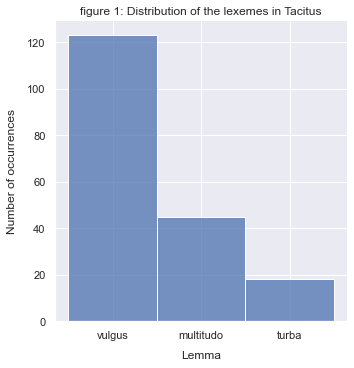

In [12]:
printmd("There are __%s occurrences__ of the three main lexemes of the crowd in Tacitus: __%s occurences__ of _vulgus_ (%s%%), __%s occurences__ of _multitudo_ (%s%%) and __%s occurences__ of _turba_ (%s%%)." %(nbre_entrees, nbre_vulgus, round(nbre_vulgus*100/nbre_entrees,2), nbre_multitudo, round(nbre_multitudo*100/nbre_entrees,2), nbre_turba, round(nbre_turba*100/nbre_entrees,2)))


fig1 = sns.displot(noms_foule_df, x="lemma")

fig1.set_axis_labels("Lemma", "Number of occurrences", labelpad=10)
plt.title("figure 1: Distribution of the lexemes in Tacitus")



### Distribution in subcorpora

Let us then observe ([figure 2](#figure-2)) the distribution of the three lexemes within the Tacitean corpus, which we will divide into three subcorpora: the _Annals_, the _Histories_ and the opuscules, composed of the _Life of Agricola_, the _Germania_ and the _Dialogue of the Orators_.

In [13]:
repartition_corpus = pd.DataFrame(columns = ["oeuvre", "nbre_mots", "lemme", "reference"])


for index, content in noms_foule_df.iterrows():
    if "Ann" in content["ref"]:
        nvelle_ligne = {"oeuvre":"ann", "nbre_mots":88905, "lemme":content["lemma"], "reference":content["ref"]}
        repartition_corpus = repartition_corpus.append(nvelle_ligne, ignore_index=True)
    if "Hist" in content["ref"]:
        nvelle_ligne = {"oeuvre":"hist", "nbre_mots":51495, "lemme":content["lemma"], "reference":content["ref"]}
        repartition_corpus = repartition_corpus.append(nvelle_ligne, ignore_index=True)
    if ("Agr" in content["ref"]) | ("Dial" in content["ref"]) | ("Germ" in content["ref"]):
        nvelle_ligne = {"oeuvre":"opusc", "nbre_mots":21562, "lemme":content["lemma"], "reference":content["ref"]}
        repartition_corpus = repartition_corpus.append(nvelle_ligne, ignore_index=True)

Text(0.5, 1.0, 'figure 2: Distribution in subcorpora')

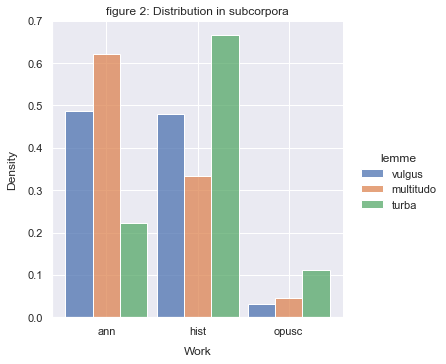

In [14]:
fig2 = sns.displot(repartition_corpus, x="oeuvre", stat="density", hue="lemme", multiple="dodge", common_norm=False, shrink=.9)
fig2.set_axis_labels("Work", "Density", labelpad=10)
plt.title("figure 2: Distribution in subcorpora")

_Analysis_: We observe a roughly equal distribution for _vulgus_ between the two major works of Tacitus, and two diametrically opposed distributions between _multitudo_ and _turba_, the first lexeme being more present in the Annals, the second in the Histories. However, we must take into account that these three subcorpora have a very variable number of words: 88,905 words for the Annals, 51,495 words for the Histories and, in total, 21,562 words for the opuscules. It is therefore necessary to correlate the total number of occurrences of the lexemes to the number of words in each subcorpus in order to get a more accurate idea of their distribution within the works of Tacitus: this is the purpose of the heatmap ([figure 3](#figure-3)) below.

In [15]:
# Constitution of a dataframe with the weighed distribution
repartition_ponderee = pd.DataFrame(columns = ["ann", "hist", "opusc", "tot"])

repartition_ponderee = repartition_ponderee.append(
    {
        "ann":(((repartition_corpus.lemme == "vulgus") & (repartition_corpus.oeuvre == "ann")).sum())*100/nbr_words_ann, 
        "hist":(((repartition_corpus.lemme == "vulgus") & (repartition_corpus.oeuvre == "hist")).sum())*100/nbr_words_hist, 
        "opusc":(((repartition_corpus.lemme == "vulgus") & (repartition_corpus.oeuvre == "opusc")).sum())*100/nbr_words_opusc,
        "tot":((repartition_corpus.lemme == "vulgus").sum())*100/161962
    },
    ignore_index=True)
    
repartition_ponderee = repartition_ponderee.append(
    {
        "ann":(((repartition_corpus.lemme == "multitudo") & (repartition_corpus.oeuvre == "ann")).sum())*100/nbr_words_ann, 
        "hist":(((repartition_corpus.lemme == "multitudo") & (repartition_corpus.oeuvre == "hist")).sum())*100/nbr_words_hist, 
        "opusc":(((repartition_corpus.lemme == "multitudo") & (repartition_corpus.oeuvre == "opusc")).sum())*100/nbr_words_opusc,
        "tot":((repartition_corpus.lemme == "multitudo").sum())*100/161962
    }, 
    ignore_index=True)

repartition_ponderee = repartition_ponderee.append(
    {
        "ann":(((repartition_corpus.lemme == "turba") & (repartition_corpus.oeuvre == "ann")).sum())*100/nbr_words_ann, 
        "hist":(((repartition_corpus.lemme == "turba") & (repartition_corpus.oeuvre == "hist")).sum())*100/nbr_words_hist, 
        "opusc":(((repartition_corpus.lemme == "turba") & (repartition_corpus.oeuvre == "opusc")).sum())*100/nbr_words_opusc,
        "tot":((repartition_corpus.lemme == "turba").sum())*100/161962
    }, 
    ignore_index=True)

repartition_ponderee = repartition_ponderee.rename(index={0:"vulgus", 1:"multitudo", 2:"turba"})

Text(0.5, 1.0, 'figure 3: Heatmap of the lexemes weighted distribution in subcorpora')

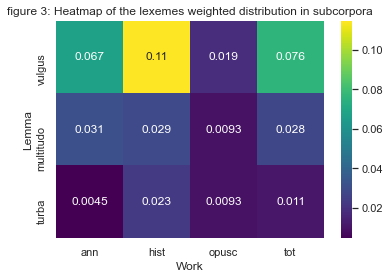

In [16]:
fig3 = sns.heatmap(repartition_ponderee, annot=True, cmap="viridis")
plt.xlabel("Work")
plt.ylabel("Lemma")
plt.title("figure 3: Heatmap of the lexemes weighted distribution in subcorpora")

_Analysis_: The graph reads as follows: the volume of occurrences of _vulgus_ within the _Annals_ represents 0.067% of the total volume of words in this work.

We can use a chi-squared test to ascertain how statistically significant the distribution of each lemma within the Tacitean subcorpora is. To do so, we create a contingency table with the observed frequency of each lemma and of the other words of each subcorpus ("non-occurences", cf. <cite data-cite="2272257/MPNW4NSX"></cite> p. 166) and we compare it to the expected frequencies. With the chi-squared test statistic, we obtain the corresponding p-value. 

In [17]:
printmd("P-value for the distribution of _vulgus_ in Tacitus is __" + str(distribution_p_value("vulgus")) + "__.")
printmd("P-value for the distribution of _multitudo_ in Tacitus is __" + str(distribution_p_value("multitudo")) + "__.")
printmd("P-value for the distribution of _turba_ in Tacitus is __" + str(distribution_p_value("turba")) + "__.")

P-value for the distribution of _vulgus_ in Tacitus is __3.918911195111008e-05__.

P-value for the distribution of _multitudo_ in Tacitus is __0.20887280868935776__.

P-value for the distribution of _turba_ in Tacitus is __0.0053847030371926285__.

It appears that the distribution of _vulgus_ is the most statistically significant, with a very small p-value (`p<0.0005`). The distribution of _turba_ is also statistically significant (`p<0.01`), but that of _multitudo_ (`p>0.1`) might no be statistically significant.

Such analysis leads to the observation that _vulgus_ is more chosen by Tacitus in the _Histories_ than in the _Annals_, an observation already made by <cite data-cite="2272257/43U2KCKU"></cite> p. 147 and <cite data-cite="2272257/CXIXUP3N"></cite> pp. 85-86, for which there are at least two possible interpretations: either an evolution of Tacitus’ style between the _Histories_ (written in the first decade of the 2nd c.) and the _Annals_ (written in the second decade of the 2nd c., cf. <cite data-cite="2272257/EJINSN7D"></cite>, pp. 241-247; on stylistic evolutions, see <cite data-cite="2272257/WMWGITW8"></cite>, app. 45-47); or a difference in the historical and narrative material, as the surviving account of the _Histories_ focuses on the civil war of 68-70 AD, while the _Annals_ cover the over fifty years of internal peace of the Julio-Claudian dynasty (14-66 AD, the narrative of the years 66-68 being lost). _Turba_ seems to experience a disaffection between the _Histories_ and the _Annals_ similar to that of _vulgus_, for which the same two explanations can be mobilized. Finally, we notice that the three lexemes are used in similar proportions in the three opuscules.

### Which specificity for Tacitus?

The dominant use of _vulgus_ within the Tacitean corpus must be confronted with the distribution of the three lexemes in the more general framework of the preserved classical Latin literature. To do so, it is possible to rely on the [Hyperbase web tool](http://hyperbase.unice.fr/), developed within the University of Nice’s research team _Bases, Corpus, Langages_, in its 2017 web version (on the use of this tool by classicists, see <cite data-cite="2272257/YPJSITQA"></cite>). This platform allows us to investigate the distribution of the three lexemes within the Latin textual bank of the Liège research team LASLA. Even if this corpus of roughly two million words does not cover the whole of Latinity (see <cite data-cite="2272257/XKUU8YH5"></cite> pp. 433-435), it provides a sense of Tacitus’ originality, by comparing him to 21 classical authors, mainly his predecessors, from the 2nd century BC to the 2nd century AD, in prose as well as in poetry.

_Method_: the LASLA corpus has first been redrawn within Hyperbase Web to group the works by author; the authors have then been classified in chronological order, in order to bring out diachronic evolutions (which eventually did not prove conclusive). We then queried Hyperbase web on the distribution of the three lexemes within the corpus, choosing as “context” the sentence (in connection with our treatment of the Tacitean corpus, see above, section 1.3.2) and as “unit” the specificity score. The generated file (`XLS` re-exported in `CSV`), without the “Total” column, is displayed in the form of a heatmap ([figure 4](#figure-4)).

In [18]:
distrib_hbs_df = pd.read_csv("distrib-rel_hyperbase.csv", sep=";")
distrib_hbs_df.set_index("lemma", inplace=True)
distrib_hbs_df = distrib_hbs_df.T

Text(0.5, 1.0, 'figure 4: Heatmap of the distribution by specificity score of the three lexemes in the LASLA corpus (Hyperbase Web data)')

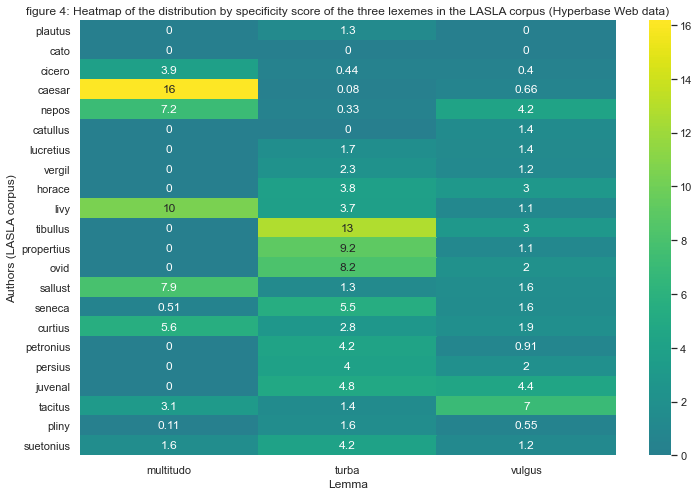

In [19]:
plt.figure(figsize=(12,8))
fig4 = sns.heatmap(distrib_hbs_df[distrib_hbs_df.index != "Total"], annot=True, xticklabels = True, yticklabels = True, center=2, cmap="viridis")
plt.xlabel("Lemma")
plt.ylabel("Authors (LASLA corpus)")
plt.title("figure 4: Heatmap of the distribution by specificity score of the three lexemes in the LASLA corpus (Hyperbase Web data)")

_Analysis_: We must obviously take into account the generic specificities of the authors listed. Regarding the poets, for instance, the metrical structure of the hexameter and the pentameter makes it impossible to use the word _multitudo_. With this remark in mind, the results shown in [figure 4](#figure-4) speak for themselves. In most of the historians and biographers (Caesar, Cornelius Nepos, Livy, Sallust, Curtius), we notice sometimes very marked preference (in Caesar in particular) for the lexeme _multitudo_. In Suetonius, the specificity score is highest for the lexeme _turba_. In the case of Tacitus, particularly noteworthy is his preferential use of the lexeme _vulgus_, which isolates him not only within the sub-corpus of historiographers, but also on the scale of the entire LASLA text bank. There is thus a first quantitative specificity of _vulgus_ within the Tacitean corpus and, more generally (even if the corpus used does not allow us to affirm this definitely), within the Latinity.

## Discriminating between the three lexemes: a contrastive perspective

To discriminate between the three lexemes, we proceed below through three complementary criteria:

1.	the function of the lexeme in the sentence;
2.	the significant lexical associations of each lexeme (phraseology);
3.	the historical context in which the lexeme appears.

### Distribution of the lexemes according to their syntactic function

A first approach is that of lemma inflection (their case) and, as a corollary, of their syntactic function. We propose in the following figures a visualization of the data that we comment on below. [figure 5](#figure-5) presents the distribution according to the morphological tag of the lexemes; [figure 6](#figure-6) is composed of three distinct histograms giving, for each lexeme, the distribution according to the syntactic tag; [figure 7](#figure-7) groups the three lexemes according to their distribution by syntactic function on a normalized histogram.

Text(0.5, 0.98, 'figure 5: Distribution according to the morphological analysis')

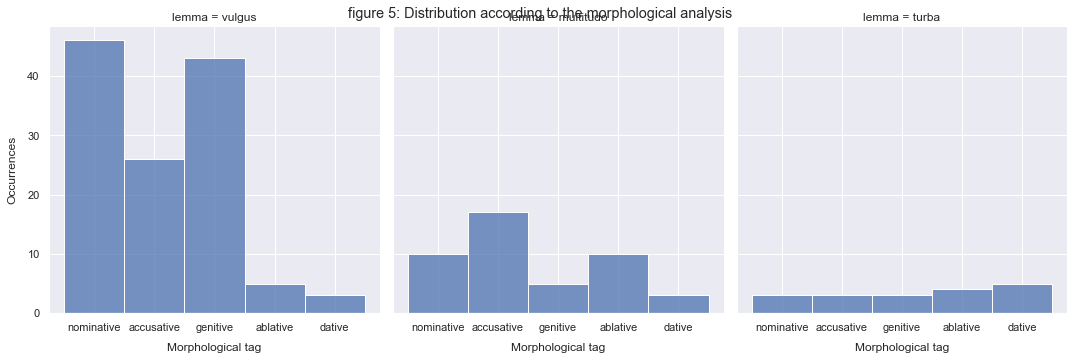

In [20]:
# Extraction of the morphological case from the LEMLAT code
noms_foule_df_morph = noms_foule_df.copy()

cases = {"n":"nominative", 
        "a":"accusative", 
        "g":"genitive", 
        "b":"ablative", 
        "d":"dative"}

for index, row in noms_foule_df_morph.iterrows():
    noms_foule_df_morph.at[index, "morph"] = cases[noms_foule_df_morph.at[index, "morph"][5]]

fig5 = sns.displot(noms_foule_df_morph, x="morph", col="lemma", multiple="dodge")
fig5.set_axis_labels("Morphological tag", "Occurrences", labelpad=10)
plt.gcf().suptitle("figure 5: Distribution according to the morphological analysis")

Text(0.5, 0.98, 'figure 6: Distribution according to the syntactic analysis')

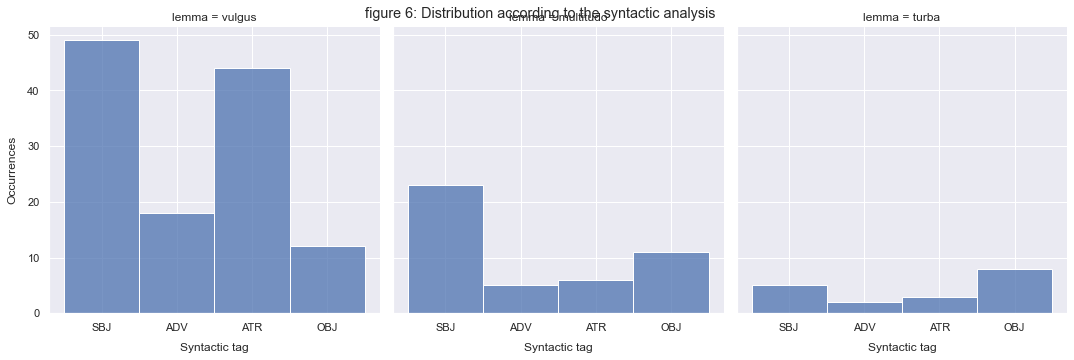

In [21]:
fig6 = sns.displot(noms_foule_df, x="synt", col="lemma", multiple="dodge")
fig6.set_axis_labels("Syntactic tag", "Occurrences", labelpad=10)
plt.gcf().suptitle("figure 6: Distribution according to the syntactic analysis")

Text(0.5, 1.0, 'figure 7: Weighted distribution according to the syntactic analysis')

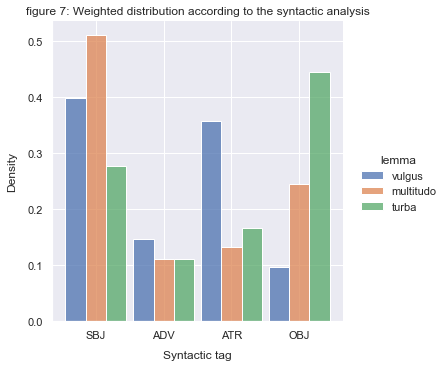

In [22]:
fig7 = sns.displot(noms_foule_df, x="synt", stat="density", hue="lemma", multiple="dodge", common_norm=False, shrink=.9)
fig7.set_axis_labels("Syntactic tag", "Density", labelpad=10)
plt.title("figure 7: Weighted distribution according to the syntactic analysis")

_Analysis_: there are several elements to look at here.

* First of all, there are divergent variations between the morphological label and the syntactic label. For example, regarding _multitudo_, the accusative (`acc-sg`) is more frequent than the nominative (`n-sg`); however, when we look at the syntactic labels, the subject function (`SBJ`) is more frequent than the object function (`OBJ`). This is simply due to the fact that the subject function can be occupied in Latin by nominatives, accusatives in infinitive clauses (accusative and infinitive) and ablatives in participle clauses (ablative absolute).

* In a contrastive perspective, we note:
    - that _vulgus_ preferentially occupies the `SBJ` (subject) and `ATR` functions (attributive, _ie_ apposition, possessive/objective/partitive constructions);
    - that _multitudo_ preferentially assumes the `SBJ` or `OBJ` functions (object, _ie_ direct or indirect object as well as passive agents);
    - that _turba_ follows a distribution close to _multitudo_, with, however, a dominant `OBJ` function;
    - that the `ADV` function (adverbial, _ie_ generally the lexemes in oblique cases specifying the circumstances of the action, except for the passive agent) is not a relevant criterion to contrast the three lexemes.

Now we want to be sure that this distribution is statistically significant, _ie._ that there is a relationship between the choice of a lemma and its syntactic function within the Tacitean corpus. We will use a chi-squared test to obtain the p-value.

In [23]:
p_value_test(noms_foule_df["lemma"], noms_foule_df["synt"])

P-value for these variables is __0.0009498832683053626__.

The very small p-value (`p<0.001`) allows us to affirm that there is a clear and statistically significative opposition (cf. [figure 6](#figure-6)) between the syntactic distribution of _vulgus_ on the one hand, most often subject of a verb or possessive noun phrase, and _multitudo_/_turba_ on the other hand, most often subject or object of a verb. These observations need to be clarified by studying the semantics of the terms with which the three lexemes are combined.

### Distribution of the lexemes according to the phraseology

This first morphosyntactic approach can be completed by the comparison of the phraseological profile of the three lexemes in Tacitus, _ie_ by studying the terms with which these lexemes are preferentially associated within the Tacitean corpus.

A first contrastive phraseological approach of the three nouns had been tried in 2016 within the Phraseotext project by K. Bouzidi, O. Kraif, J. Sorba and myself <cite data-cite="2272257/XG6NW36A"></cite>. The aim was then to bring out the combinatorial profile of these lexical units, that is to study the stereotypical semantic and syntactic associations of each of these terms, using the [Lexicoscope](http://phraseotext.u-grenoble3.fr/lexicoscope/), a tool that extracts the most representative collocates of a given pivotal term <cite data-cite="2272257/FGLIUM7E"></cite>. This study focused on a larger corpus than the present paper, since it included, alongside Tacitus, several late Republican and imperial prose writers; it was also mainly conceived as a exploratory approach, since the automatic, data-driven dependency parsing of our corpus (through a stochastic parser) involved a not negligible error rate. However, several interesting results had emerged in this preliminary study. Indeed, the collocates (_ie_ the stereotypical co-occurrents) of _turba_ and _multitudo_ convey in this corpus mainly the semantic features /intensity/ (_ingens_, _magnus_, _tantus_) and /movement/ (_circumfundo_, _concito_, _effundo_, _convenio_, _traduco_), while _vulgus_ is mainly associated with abstract terms and nouns of opinion and/or speech (_rumor_, _opinio_, _favor_, _sermo_). Combining colligation and collocation analyses (<cite data-cite="2272257/ZPJB3U77"></cite> pp. 45-50), we also observed in this paper that _multitudo_ and _turba_ were in about one case out of two complements of control verbs (_agere_, _circumdare_, _cogere_, etc.), while this type of association was much rarer for _vulgus_ (one case out of five). It was thus possible to infer an opposition between, on the one hand, _multitudo_ and _turba_ – the crowd observed in its concrete, physical, spatial realization, and hence considered as a whole that can be controlled, manipulated, gathered or dispersed – and, on the other hand, _vulgus_ – the crowd as a single entity, thinking with a single mind, speaking with a single voice, and whose opinion remains largely autonomous and can hardly be controlled. This first morphosyntactic approach can be completed by the comparison of the phraseological profile of the three lexemes in Tacitus, _ie_ by studying the terms with which these lexemes are preferentially associated within the Tacitean corpus.

The objective of this section of the present study is to compare these preliminary results with our data, collated through manual tagging within a smaller corpus, the works of Tacitus. As mentioned above, for each occurrence of the lexemes, the term on which it depends (head) and the term which depends on it (dependent) were extracted, following a common standard for the syntactic annotation of Latin treebanks (see above, sections 1.3.7-9). In this way, only the most syntactically significant collocations are taken into account.

1. First, we observe the distribution of the lexemes according to the main semantic feature of their collocates (head or dependent).
2. Then, we synthesize the numerical distribution of collocates (distinguishing between head and dependent) to determine the amount of different collocates of each lexeme in Tacitus, before detailing in tabular form the most represented collocates.

#### Semantics of the collocates

Observation in the form of a heatmap of the main semantic feature of each lexeme’s collocates, whether head or dependent: raw data (with figures) in [figure 8a](#figure-8a) and normalized data in [figure 8b](#figure-8b).

In [24]:
semantisme_coll = pd.DataFrame()
semantisme_head = pd.DataFrame()
semantisme_dpt = pd.DataFrame()

semantisme_head = semantisme_head.append(noms_foule_df[noms_foule_df["lemma"] == "vulgus"]["hd_main_feature"].value_counts(), ignore_index=True)
semantisme_head = semantisme_head.append(noms_foule_df[noms_foule_df["lemma"] == "multitudo"]["hd_main_feature"].value_counts(), ignore_index=True)
semantisme_head = semantisme_head.append(noms_foule_df[noms_foule_df["lemma"] == "turba"]["hd_main_feature"].value_counts(), ignore_index=True)
semantisme_head = semantisme_head.rename(index={0:"vulgus", 1:"multitudo", 2:"turba"})
semantisme_head = semantisme_head.fillna(0)

semantisme_dpt = semantisme_dpt.append(noms_foule_df[noms_foule_df["lemma"] == "vulgus"]["dpt_main_feature"].value_counts(), ignore_index=True)
semantisme_dpt = semantisme_dpt.append(noms_foule_df[noms_foule_df["lemma"] == "multitudo"]["dpt_main_feature"].value_counts(), ignore_index=True)
semantisme_dpt = semantisme_dpt.append(noms_foule_df[noms_foule_df["lemma"] == "turba"]["dpt_main_feature"].value_counts(), ignore_index=True)
semantisme_dpt = semantisme_dpt.rename(index={0:"vulgus", 1:"multitudo", 2:"turba"})
semantisme_dpt = semantisme_dpt.fillna(0)

semantisme_coll = semantisme_head.append(semantisme_dpt)
semantisme_coll = semantisme_coll.groupby(semantisme_coll.index).sum()

# Separation of multiple semantic features
for label, content in semantisme_coll.items():
    if "," in label:
        traits = label.split(", ")
        for trait in traits:
            if trait in semantisme_coll.columns:
                semantisme_coll[trait] += content.values
            else:
                semantisme_coll[trait] = content.values
        semantisme_coll = semantisme_coll.drop(columns=[label])


# Totals become integer variables and the dataframe is reorganised alphabetically
semantisme_coll = semantisme_coll.astype(int)
semantisme_coll = semantisme_coll.sort_index(axis=1)

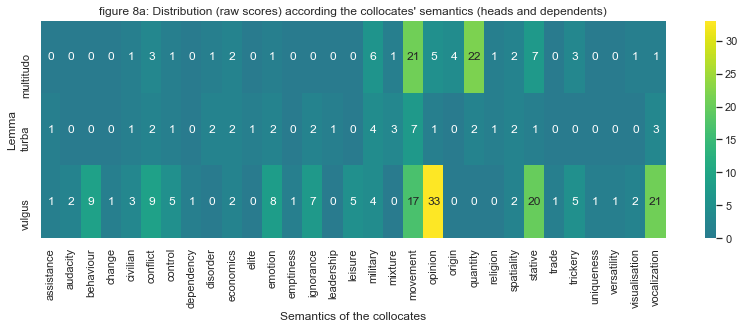

In [25]:
plt.figure(figsize=(14,4))
fig8a = sns.heatmap(semantisme_coll, annot=True, xticklabels = True, yticklabels = True, center=5, cmap="viridis")
plt.xlabel("Semantics of the collocates")
plt.ylabel("Lemma")
plt.title("figure 8a: Distribution (raw scores) according the collocates' semantics (heads and dependents)")
plt.show()

In [26]:
p_value_test(noms_foule_df["lemma"], noms_foule_df["hd_main_feature"])

P-value for these variables is __8.881242297142933e-09__.

Given the very small p-value (`p<0.0001`), we can say that there is a statistically significant relationship between the lemma and its head's main semantic feature in Tacitus.

In [27]:
# Normalisation
semantisme_coll_norm = semantisme_coll.apply(lambda x: (x-x.mean())/x.std(), axis = 1)

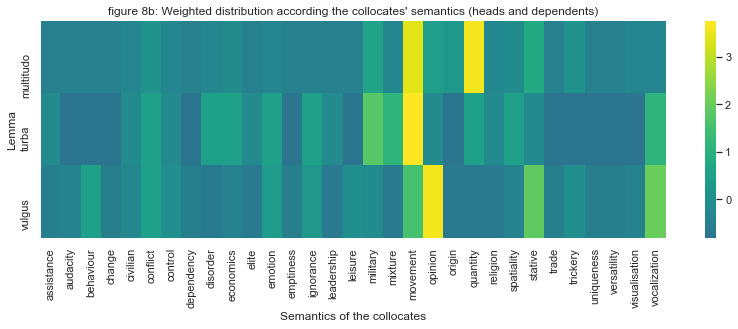

In [28]:
plt.figure(figsize=(14,4))
fig8b = sns.heatmap(semantisme_coll_norm, xticklabels = True, yticklabels = True, center=0, cmap="viridis")
plt.xlabel("Semantics of the collocates")
plt.ylabel("Lemma")
plt.title("figure 8b: Weighted distribution according the collocates' semantics (heads and dependents)")
plt.show()

_Analysis_: We observe in the normalized heatmap ([figure 8b](#figure-8b)) that the semantics of collocations is an efficient criterion to discriminate between lexemes. _multitudo_ collocates preferentially with lexemes having the semantic feature /quantity/ (an expected result considering the etymology of the term), but also /movement/. The collocates of _turba_ bring out the features /movement/, but also /mixture/, /military/, and we note recurrent, but less frequent, associations with the /conflict/, /disorder/, /spatiality/ and /vocalization/ features. _Vulgus_ collocates with lexical items associated with the semantic feature /opinion/, with a strong presence of /vocalization/ and terms describing a state of the crowd, like stative verbs (/stative/).

#### Comparison with the co–occurrences (Hyperbase Web)

A quick comparison can be made with the co–occurrence extraction through the Hyperbase web platform (LASLA database). Co–occurrence refers to the presence of two linguistic units in the same span of text (here, the chosen search window is the sentence), without any particular syntactic relationship (co–occurrents are therefore not always collocates, since the notion of collocation refers to a type of sequence of compositional meaning whose constituent parts are not attracted by chance).

In __table 1__ below, we present all the co–occurrents of the three lexemes extracted through Hyperbase (corpus of Tacitus’ works tagged by the LASLA), limiting ourselves to the most significant co–occurrents, _ie_ whose specificity score is higher than 3.5 (on the hypergeometric probability calculation resulting in this specificity score, see [É. Brunet's Hyperbase manual](http://ancilla.unice.fr/hyperbase/manuel.pdf) pp. 37-41).

In [29]:
cooc_tac_m_hbs = pd.read_csv("cooc-multitudo-tac_hyperbase.csv", sep=";", encoding="latin1")
cooc_tac_v_hbs = pd.read_csv("cooc-uulgus-tac_hyperbase.csv", sep=";", encoding="latin1")
cooc_tac_t_hbs = pd.read_csv("cooc-turba-tac_hyperbase.csv", sep=";", encoding="latin1")

cooc_tac_m_hbs["lemma"] = "multitudo"
cooc_tac_v_hbs["lemma"] = "vulgus"
cooc_tac_t_hbs["lemma"] = "turba"
cooc_tac_hbs = pd.concat([cooc_tac_m_hbs, cooc_tac_t_hbs, cooc_tac_v_hbs])

# Cleaning of the Hyperbase data
cooc_tac_hbs.drop(0, inplace=True) # leaving the first cooccurrent, always empty in the Hyperbase CSV
cooc_tac_hbs.drop(cooc_tac_hbs[cooc_tac_hbs["Mot"].str.contains(" N")].index, inplace=True) # putting away names of people
cooc_tac_hbs["Mot"] = cooc_tac_hbs["Mot"].str.lower().str.replace("lem:", "").str.replace("v", "u").str.replace(" [0-9]", "", regex=True) # on enlève les chiffres désambiguïsant les homonymes
cooc_tac_hbs.reset_index(inplace=True, drop=True)
cooc_tac_hbs.columns = ['specificity', 'probability', 'frequency_corpus', 'frequency_part', 'size_corpus', 'size_part', 'word', 'lemma']
cooc_tac_hbs = cooc_tac_hbs[["lemma", "word", "specificity", "probability", "frequency_corpus", "frequency_part", "size_corpus", "size_part"]]

In [30]:
caption_content = 'table 1 : Co-occurrents of the lexemes (specificity > 3.5, data Hyperbase Web / LASLA)'
display(cooc_tac_hbs[cooc_tac_hbs["specificity"] > 3.5].style.set_caption(caption_content).hide_index(),
        metadata={"jdh":{"object":{"source": [caption_content]}}})

lemma,word,specificity,probability,frequency_corpus,frequency_part,size_corpus,size_part
multitudo,ob,4.280000,0.000015,808,7,2104866,2001
multitudo,urbs,4.110000,0.000034,2930,12,2104866,2001
multitudo,ac,3.900000,0.000083,6542,18,2104866,2001
multitudo,iussum,3.850000,0.000104,93,3,2104866,2001
multitudo,conglobo,3.780000,0.000137,18,2,2104866,2001
turba,ciuilis,4.130000,0.000031,391,4,2104866,927
turba,inconditus,3.810000,0.000121,36,2,2104866,927
turba,ac,3.690000,0.000196,6542,11,2104866,927
turba,immisceo,3.640000,0.000243,51,2,2104866,927
vulgus,miles,5.570000,0.000000,2511,22,2104866,4275


_Analysis_: The different method used to generate this table proves less efficient when discriminating between the three main lexemes of the crowd. Aside from the numerous prepositions and conjunctions extracted by Hyperbase, which are not very telling, the semantics of each lexeme's most specific co-occurents do not appear as clearly as in our manual collation above, although one can notice the combination between _multitudo_ and words indicating a spatialization or quantitative importance of the crowd (_conglobo_, “to gather”), _turba_ and terms with the semantic features /mixture/ and /disorder/ (_immisceo_, “to blend in”, _inconditus_, “disordered”), and _vulgus_ with verbs and nouns of opinion and vocalisation (_appello_, “to call”, _favor_, “favour”, _superstitio_, “superstition”).

#### Recurrence of collocates

##### Heads

Let us first look at the recurrence of collocates to identify whether the lexemes of the crowd preferentially associate with a reduced or with a broad set of terms. [figure 9a](#figure-9a) shows the distribution by lexeme of the number of occurrences of each head. [figure 9b](#figure-9b) focuses on _vulgus_, whose distribution is different from that of _multitudo_ and _turba_.

In [31]:
# Heads by lexeme
head_vulgus = noms_foule_df[noms_foule_df["lemma"] == "vulgus"].l_head.value_counts()
head_multitudo = noms_foule_df[noms_foule_df["lemma"] == "multitudo"].l_head.value_counts()
head_turba = noms_foule_df[noms_foule_df["lemma"] == "turba"].l_head.value_counts()

# Constitution of the dataframe
head_df = pd.DataFrame({"vulgus": head_vulgus, "turba": head_turba, "multitudo": head_multitudo})
head_df = head_df.fillna(0)
head_df = head_df[["vulgus", "multitudo", "turba"]]

# Separation of multiple collocates
for index, content in head_df.iterrows():
    if "," in index:
        coocs = index.split(", ")
        for cooc in coocs:
            if cooc in head_df.index:
                head_df.loc[cooc] += content
            else:
                head_df.loc[cooc] = content

Text(0.5, 1.0, 'figure 9a: Distribution according to the reccurrence of the head collocates')

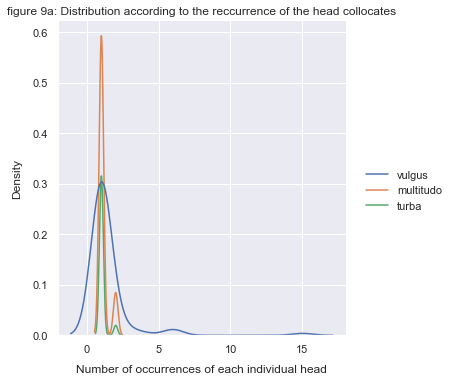

In [32]:
fig9a = sns.displot(head_df[head_df >= 1], kind="kde")
fig9a.set_axis_labels("Number of occurrences of each individual head", "Density", labelpad=10)
plt.title("figure 9a: Distribution according to the reccurrence of the head collocates")

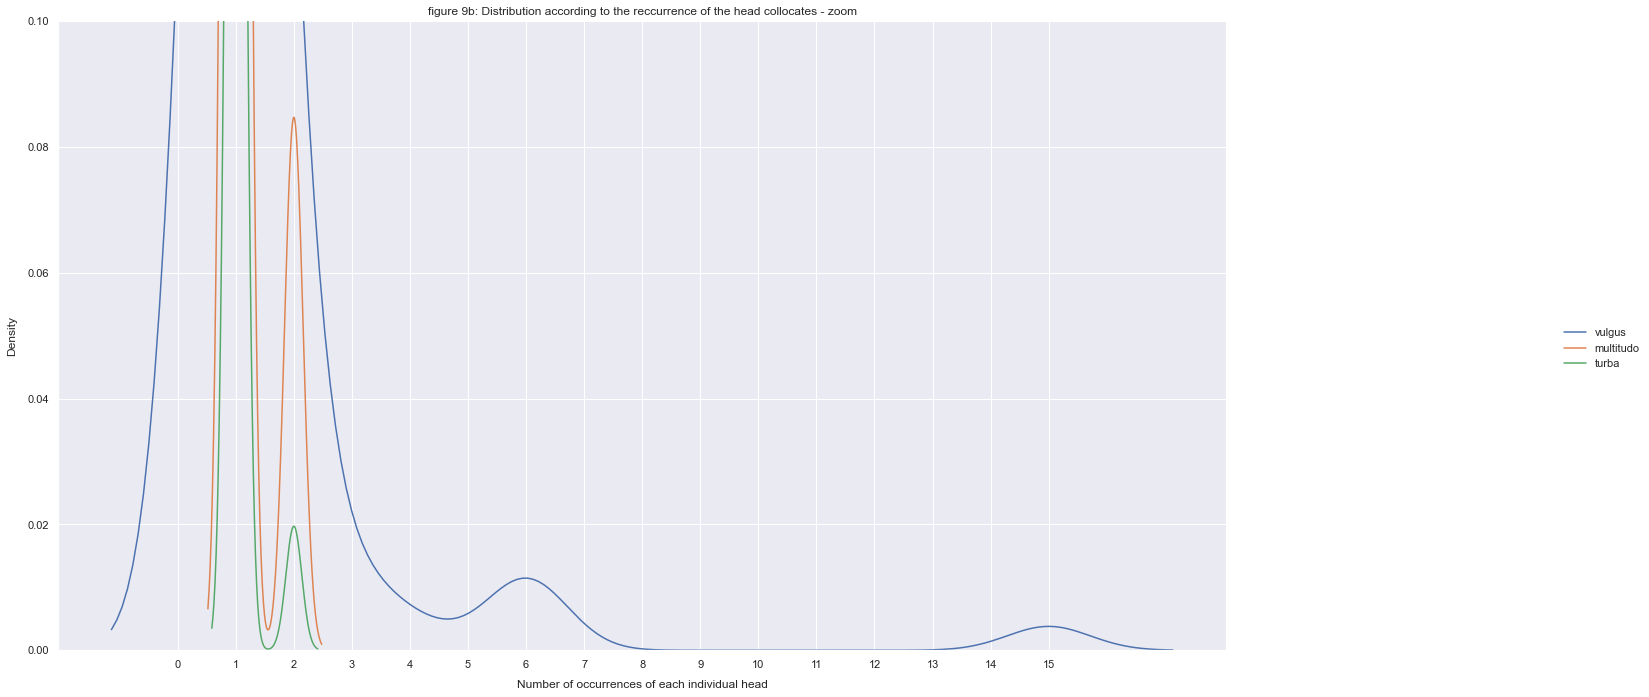

In [33]:
fig9b = sns.displot(head_df[head_df >= 1], kind="kde")
fig9b.set_axis_labels("Number of occurrences of each individual head", "Density", labelpad=10)
plt.ylim(0, .1)
x_ticks = np.arange(0, 16, 1)
plt.xticks(x_ticks)
plt.title("figure 9b: Distribution according to the reccurrence of the head collocates - zoom")

plt.gcf().set_size_inches(25, 10)

_Analysis_: The results show a strong contrast between _vulgus_ on the one hand and _multitudo_/_turba_ on the other. All three lexemes are mostly associated with unique collocates. However, the density estimation shows that the number of unique collocates is much higher for _multitudo_ than for _turba_ and _vulgus_. More interestingly, _vulgus_ is the only term to have collocates that appear more than twice, and even has a collocate that occurs 15 times in the Tacitean corpus. To investigate this point, [table 2](#table-2) below shows the amount of occurrences of each head associated more than once with _multitudo_, _turba_ and/or _vulgus_.

In [34]:
caption_content = 'table 2 : Heads associated more than once to each lexeme'
display(head_df[(head_df["vulgus"] >= 2) | (head_df["turba"] >= 2) | (head_df["multitudo"] >= 2)].astype("int").sort_values(by=["vulgus", "multitudo"], ascending=False).style.set_caption(caption_content),
        metadata={"jdh":{"object":{"source": [caption_content]}}})


,vulgus,multitudo,turba
sum,15,2,0
credo,6,0,0
rumor,6,0,0
studium,6,0,0
adstrepo,4,0,0
os,3,0,0
sermo,3,0,0
appello,2,0,0
capio,2,0,0
favor,2,0,0


This table shows, in a complementary way to the graph of [figure 9a](#figure-9a) and [figure 9b](#figure-9b), the singularity of _vulgus_, which has a higher number of recurrent head (defined as lemmas on which a lexeme depends at least twice) than _multitudo_ and _turba_ (11 occ. vs 4 occ. and 1 occ. respectively).

The lexical profile of these recurrent collocates confirms our observation above. Indeed, for _multitudo_ and _turba_, the semantics of the heads recorded are essentially oriented towards indications of spatial movement (with the exception of _consensus_, “unanimity” for _multitudo_). On the contrary, for _vulgus_, they are mostly nouns or verbs referring to an opinion (_credere_, “to believe”; _rumor_, “gossip”; _studium_, “inclination”; _favor_, “favour”), an attitude (_mos_, “habit”) or a vocalization (_adstrepere_, “to respond noisily”; _os_, “mouth”; _appellare_, “to speak to”).

Four factors can be put forward to explain why the verb _esse_ occurs so frequently (__15__ occ.) : 
* attributive structures in which _vulgus_ is the complement of the copula _esse_ (_eg_ : _aliquid est vulgo_, “sth belongs to the crowd”);
* attributive structures in which _vulgus_ is the subject of the copula _esse_ and receives a complement (_eg_ : _vulgus est aliquid_, “the crowd is sth”);
* structures in which _vulgus_ becomes an adverbial of place (_eg_ : _aliquid est per vulgum_, “sth is among the crowd”);
* elliptical structures, in which we have restored the implied verb _esse_ (cf. above, section 1.3.8) and which belong to one of the three categories above.

A quick look at the Latin text of these 15 occurrences confirms this analysis:

In [35]:
for index, content in noms_foule_df[(noms_foule_df["lemma"] == "vulgus") & (noms_foule_df["l_head"] == "sum")].sort_values(by=["synt"]).iterrows():
    string = highlight_lex("__%s__ (`%s`) : _%s_ (\"%s\")\n" %(content["ref"], content["synt"], content["sentence"], content["translation"]))
    printmd(highlight_esse(string))

__Ann. 1.29.3__ (`ADV`) : _certatum inde sententiis, cum alii opperiendos legatos atque interim comitate permulcendum militem censerent, alii fortioribus remediis agendum: nihil in __vulgo__ modicum: terrere ni paveant, ubi pertimuerint inpune contemni: dum superstitio urgeat, adiciendos ex duce metus sublatis seditionis auctoribus_ ("There was now a conflict of opinions, some proposing to wait for the return of the deputies and humour the troops in the meantime by a show of leniency, while others were for sterner remedies:-"A crowd was nothing if not extreme: it must either bluster or cringe: once terrified, it could be ignored with impunity: now that it was depressed by superstition was the moment for the general to inspire fresh terror by removing the authors of the mutiny." ")


__Ann. 1.76.3__ (`ADV`) : _edendis gladiatoribus, quos Germanici fratris ac suo nomine obtulerat, Drusus praesedit, quamquam vili sanguine nimis gaudens: quod in __vulgus__ formidolosum et pater arguisse dicebatur_ ("A show of gladiators, given in the name of his brother Germanicus, was presided over by Drusus, who took an extravagant pleasure in the shedding of blood however vile-a trait so alarming to the populace that it was said to have been censured by his father.")


__Ann. 14.60.5__ (`ADV`) : _inde crebri questus nec occulti per __vulgum__, cui minor sapientia <et> ex mediocritate fortunae pauciora pericula sunt_ ("The measure led to general and undisguised protests from the common people, endowed with less discretion than their superiors, and-thanks to their humble station-faced by fewer perils.")


__Ann. 15.48.2__ (`ADV`) : _is Calpurnio genere ortus ac multas insignisque familias paterna nobilitate complexus, claro apud __vulgum__ rumore __erat__ per virtutem aut species virtutibus similis_ ("Piso, sprung from the Calpurnian house, and, by his fathers high descent, uniting in his own person many families of distinction, enjoyed with the multitude a shining reputation for virtue, or for spectacular qualities resembling virtues.")


__Hist. 1.86.2__ (`ADV`) : _fames in __vulgus__ inopia quaestus et penuria alimentorum_ ("The common people were reduced to famine by lack of employment and failure of supplies.")


__Hist. 2.26.5__ (`ADV`) : _apud paucos ea ducis ratio probata, in __vulgus__ adverso rumore fuit_ ("A few approved of the generals plan, but it caused adverse comment among the mass of the soldiers.")


__Hist. 2.93.2__ (`ADV`) : _postremo ne salutis quidem cura infamibus Vaticani locis magna pars tetendit, unde crebrae in __vulgus__ mortes_ ("Finally, with no regard even for their very lives, a large proportion camped in the unhealthy districts of the Vatican, which resulted in many deaths among the common soldiery.")


__Ann. 1.39.3__ (`OBJ`) : _utque mos __vulgo__ quamvis falsis reum subdere, Munatium Plancum consulatu functum, principem 
legationis, auctorem senatus consulti incusant_ ("With the common propensity of crowds to find a victim, however false the charge, they accused Munatius Plancus, an ex-consul who was at the head of the deputation, of initiating the decree")


__Ann. 4.64.1__ (`OBJ`) : _feralemque annum ferebant et ominibus adversis susceptum principi consilium absentiae, qui mos __vulgo__, fortuita ad culpam trahentes, ni Caesar obviam isset tribuendo pecunias ex modo detrimenti_ (""It was a fatal year, and the sovereigns decision to absent himself had been adopted under an evil star"-so men began to remark, converting, as is the habit of the crowd, the fortuitous into the culpable, when the Caesar checked the critics by a distribution of money in proportion to loss sustained. ")


__Ann. 14.14.2__ (`SBJ`) : _mox ultro vocari populus Romanus laudibusque extollere, ut __est__ __vulgus__ cupiens voluptatum et, si eodem princeps trahat, laetum_ ("Before long, the Roman people received an invitation in form, and began to hymn his praises, as is the way of the crowd, hungry for amusements, and delighted if the sovereign draws in the same direction. ")


__Ann. 15.64.2__ (`SBJ`) : _nam ut __est__ __vulgus__ ad deteriora promptum, non defuere qui crederent, donec implacabilem Neronem timuerit, famam sociatae cum marito mortis petivisse, deinde oblata mitiore spe blandimentis 
vitae evictam_ ("For, with the usual readiness of the multitude to think the worst, there were those who believed that, so long as she feared an implacable Nero, she had sought the credit of sharing her husbands fate, and then, when a milder prospect offered itself, had succumbed to the blandishments of life.")


__Hist. 1.69.1__ (`SBJ`) : _ut __est__ mos, __vulgus__ mutabile subitis et tam pronum in misericordiam quam immodicum saevitia fuerat_ ("Like all mobs, the common soldiers were given to sudden change and were as ready to show pity as they had been extravagant in cruelty.")


__Hist. 1.80.2__ (`SBJ`) : _fremit miles et tribunos centurionesque proditionis arguit, tamquam familiae senatorum ad perniciem Othonis armarentur, pars ignari et vino graves, pessimus quisque in occasionem praedarum, __vulgus__, ut mos __est__, cuiuscumque motus novi cupidum: et obsequia meliorum nox abstulerat_ ("The soldiers began to murmur and charged the tribunes and centurions with treachery, saying that the slaves of the senators were being armed for Othos destruction. A part of the soldiers were ignorant of the circumstances and heavy with wine: the worst of them wished to make this an opportunity for looting: the great mass, as is usual, were ready for any new movement, and the natural obedience of the better disposed was rendered ineffective by the night.")


__Hist. 2.29.5__ (`SBJ`) : _ut vero deformis et flens et praeter spem incolumis Valens processit, gaudium miseratio favor: versi in laetitiam, ut __est__ __vulgus__ utroque immodicum, laudantes gratantesque circumdatum aquilis signisque in tribunal ferunt_ ("When Valens appeared in sorry plight and weeping, but unexpectedly safe, there came joy, pity, and even popularity. In their revulsion from anxiety to delight - mobs are always extravagant in both directions-they praised and congratulated him, surrounded him with the eagles and colours, and carried him to the tribunal.")


__Hist. 4.37.1__ (`SBJ`) : _ubi sedato impetu metus rediit, centuriones cum epistulis ad civitates Galliarum misere, auxilia ac stipendia oraturos: ipsi, ut __est__ __vulgus__ sine rectore praeceps pavidum socors, adventante Civile raptis temere armis ac statim omissis, in fugam vertuntur_ ("When this outburst died down, their fears returned: and the troops sent centurions with letters to the Gallic communities to ask for auxiliary troops and contributions: they themselves, for a mob without a leader is always hasty, timid, and without energy, at the approach of Civilis quickly caught up their arms, then immediately dropped them and fled.")


##### Dependents

The same work can be done for the dependents of one of the three lexemes studied.[Figure 10](#figure-10) represents the recurrence of collocates depending on a lexeme of the crowd.

In [36]:
dependent_vulgus = noms_foule_df[noms_foule_df["lemma"] == "vulgus"].l_dependent.value_counts()
dependent_multitudo = noms_foule_df[noms_foule_df["lemma"] == "multitudo"].l_dependent.value_counts()
dependent_turba = noms_foule_df[noms_foule_df["lemma"] == "turba"].l_dependent.value_counts()

dependent_df = pd.DataFrame({"vulgus": dependent_vulgus, "turba": dependent_turba, "multitudo": dependent_multitudo})
dependent_df = dependent_df.fillna(0)
dependent_df = dependent_df[["vulgus", "multitudo", "turba"]]

# Separation of multiple collocations
for index, content in dependent_df.iterrows():
    if "," in index:
        coocs = index.split(", ")
        for cooc in coocs:
            if cooc in dependent_df.index:
                dependent_df.loc[cooc] += content
            else:
                dependent_df.loc[cooc] = content

Text(0.5, 1.0, 'figure 10: Distribution according to the reccurrence of the dependent collocates')

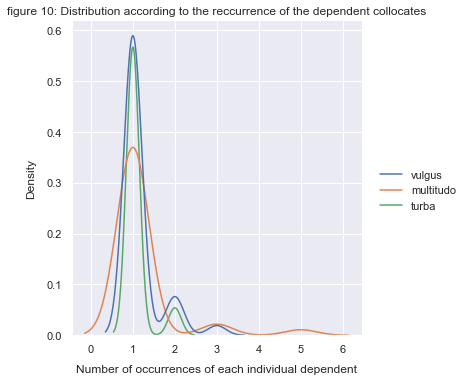

In [37]:
fig10 = sns.displot(dependent_df[dependent_df >= 1], kind="kde")
fig10.set_axis_labels("Number of occurrences of each individual dependent", "Density", labelpad=10)
plt.title("figure 10: Distribution according to the reccurrence of the dependent collocates")

_Analysis_: The data are less contrasted here. We can see that _multitudo_ is more frequently combined with the same terms, while the dependents of _turba_ and _vulgus_ are more often unique collocates. A look at the dependents associated more than once with our lexemes (__table 3__) will allow us to investigate their semantics:

In [38]:
caption_content = 'table 3 : Dependents associated more than once to each lexeme'
display(dependent_df[(dependent_df["vulgus"] >= 2) | (dependent_df["turba"] >= 2) | (dependent_df["multitudo"] >= 2)].astype("int").sort_values(by=["vulgus", "multitudo"], ascending=False).style.set_caption(caption_content).hide_index(),
        metadata={"jdh":{"object":{"source": [caption_content]}}})

vulgus,multitudo,turba
3,0,0
2,0,0
2,0,1
2,0,0
2,0,0
1,1,2
0,5,0
0,3,0
0,3,0
0,1,2


We distinguish here between dependent collocates that serve to define the composition of the crowd, especially in a military context (_miles_, crowd of “soldiers”, _imbellis_, crowd of “non–combatants”, or _hostis_, crowd of “enemies”), collocates that characterize the crowd from a moral point of view (_credulus_, “credulous”; _imperitus_, “ignorant”; _insultare_, “to behave insolently”; _laetus_, “happy”) and collocates that present the physical or spatial characteristics of the crowd (_ingens_, “immense”; _tantus_, “of such size”; _inconditus_, “disordered”). While the first category is equally represented with the three lexemes – _imbellis_ is even used for all three – the second is specific to _vulgus_ and the third to _multitudo_ and _turba_.

### Distribution of the lexemes according to the historical context

A final criterion to contrast the three lexemes, which is more open to interpretation, is the historical context in which the crowds appear. By historical context, we mean both the spatial framework as well as the behaviour of the crowd itself. Based on the set of tags described above (sections 1.3.11-15), we will question here successively: 

* the type of crowd (civilians or soldiers), [figure 11](#figure-11) ;
* the geographical framework (Rome and Italy, the provinces, the "barbarian" territory), [figure 12](#figure-12) ;
* the social composition of the crowds (popular extraction, noble extraction, non–citizens and slaves), [figure 13](#figure-13);
* finally, two “ethological” criteria pertaining to the crowd behaviour, rated on a scale follows a basic intensity scale (from `0` to `1` with `0.25` increments):
    * their inscription in a precise spatial framework ("spatialization"), [figure 14](#figure-14) ;
    * the existence of a political component in their behaviour, and more specifically the dissent nature of the crowd behaviour (“political agency”), [figure 15](#figure-15).
    
We will be reporting p-value for each of these categories to ascertain the statistical significance of our results.

#### Type of crowd

Text(0.5, 1.0, 'figure 11: Distribution according to the type of crowd')

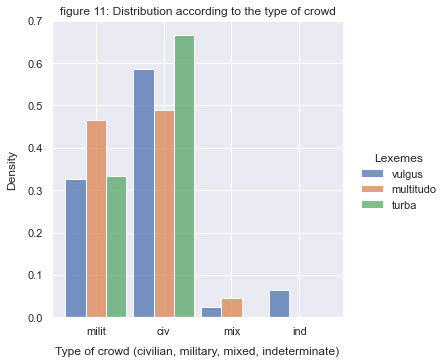

In [39]:
fig11 = sns.displot(noms_foule_df, x="type_crowd", stat="density", hue="lemma", multiple="dodge", common_norm=False, shrink=.9)

fig11.set_axis_labels("Type of crowd (civilian, military, mixed, indeterminate)", "Density", labelpad=10)
fig11.legend.set_title("Lexemes")
plt.title("figure 11: Distribution according to the type of crowd")

In [40]:
p_value_test(noms_foule_df["lemma"], noms_foule_df["type_crowd"])

P-value for these variables is __0.24838111517847827__.

_Analysis_: With a quite high p-value (`p>0.1`), these results might not be statistically significant. In any case, this first historical criterion does not offer a very efficient tool to discriminate between the different lexemes, and only shows a slight variation between _multitudo_ (used in equal proportion for civil and military crowds) and _vulgus_/_turba_, which refer more frequently to a civilian or urban crowd. There are also several instances of _vulgus_ where it is difficult to specify whether it refers to one or the other type of crowd, sometimes because of the general nature of the assertion (_eg_ in phrases such as _vulgus putat/credit_, “the common people thinks/believes that…”), or when Tacitus describes a strand of public opinion which, in the context, could be assigned, in Rome, either way to civilians or praetorians (_eg_ for the popularity of Piso in Tac., _Ann._, 15.48.2). Here are the relevant passages:

In [41]:
for index, content in noms_foule_df[(noms_foule_df["lemma"] == "vulgus") & (noms_foule_df["type_crowd"] == "ind")].iterrows():
    printmd(highlight_lex("__%s__ : _%s_ (\"%s\")\n" %(content["ref"], content["sentence"], content["translation"])))

__Ann. 6.22.2__ : _neque mala vel bona quae __vulgus__ putet_ ("Nor, they maintain, are evil and good what the crowd imagines.")


__Ann. 11.17.3__ : _adstrepebat huic alacre vulgus_ ("The crowd shouted applause.")


__Ann. 12.69.3__ : _testamentum tamen haud recitatum, ne antepositus filio privignus iniuria et invidia animos __vulgi__ turbaret_ ("His will, however, was not read, lest the preference of the stepson to the son should leave a disquieting impression of injustice and invidiousness upon the mind of the common people.")


__Ann. 13.17.1__ : _in campo tamen Martis sepultus est adeo turbidis imbribus, ut __vulgus__ iram deum portendi crediderit adversus facinus cui plerique etiam hominum ignoscebant, antiquas fratrum discordias et insociabile regnum aestimantes_ ("Still, his ashes were buried in the Field of Mars, under such a tempest of rain that the crowd believed it to foreshadow the anger of the gods against a crime which, even among men, was condoned by the many who took into account the ancient instances of brotherly hatred and the fact that autocracy knows no partnership.")


__Ann. 14.35.1__ : _Boudicca curru filias prae se vehens, ut quamque
nationem accesserat, solitum quidem Britannis feminarum ductu bellare testabatur, sed tunc non ut tantis maioribus ortam regnum et opes, verum ut unam e __vulgo__ libertatem amissam, confectum verberibus corpus, contrectatam filiarum pudicitiam ulcisci_ ("Boudicca, mounted in a chariot with her daughters before her, rode up to clan after clan and delivered her protest:-"It was customary, she knew, with Britons to fight under female captaincy: but now she was avenging, not, as a queen of glorious ancestry, her ravished realm and power, but, as a woman of the people, her liberty lost, her body tortured by the lash, the tarnished honour of her daughters."")


__Ann. 14.58.2__ : _vulgoque fingebant petitum ab eo Corbulonem, magnis tum exercitibus praesidentem et, clari atque insontes si interficerentur, praecipuum ad pericula_ ("It was a general story that he had made his way to Corbulo, then at the head of large armies, and should there be a killing of the famous and the innocent, especially exposed to danger.")


__Ann. 15.48.2__ : _is Calpurnio genere ortus ac multas insignisque familias paterna nobilitate complexus, claro apud __vulgum__ rumore erat per virtutem aut species virtutibus similis_ ("Piso, sprung from the Calpurnian house, and, by his fathers high descent, uniting in his own person many families of distinction, enjoyed with the multitude a shining reputation for virtue, or for spectacular qualities resembling virtues.")


__Hist. 3.85.3__ : _et __vulgus__ eadem pravitate insectabatur interfectum qua foverat viventem_ ("And the people attacked his body after he was dead with the same base spirit with which they had fawned on him while he lived.")


#### Geographical framework

Text(0.5, 1.0, 'figure 12: Distribution according to the geographical framework')

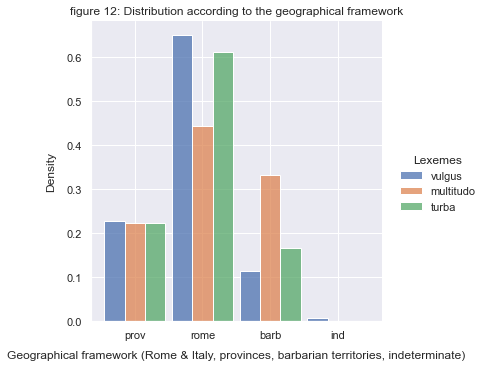

In [42]:
fig12 = sns.displot(noms_foule_df, x="geographical_framework", stat="density", hue="lemma", multiple="dodge", common_norm=False, shrink=.9)
fig12.set_axis_labels("Geographical framework (Rome & Italy, provinces, barbarian territories, indeterminate)", "Density", labelpad=10)
fig12.legend.set_title("Lexemes")
plt.title("figure 12: Distribution according to the geographical framework")

In [43]:
p_value_test(noms_foule_df["lemma"], noms_foule_df["geographical_framework"])

P-value for these variables is __0.05983199152805996__.

This p-value allows us to say that there is probably a relationship between the lemma and the type of crowd depicted. Yet, as `p≤0.05`, the rejection of the null hypothesis is not very strong.

_Analysis_: The graph shows another specificity of _multitudo_, whose distribution among the three geographical frameworks considered is rather balanced, and which does not seem to be strongly associated to a specific context. On the contrary, _vulgus_ becomes rarer the further away one gets from Rome and Italy.

#### Social composition

Text(0.5, 1.0, 'figure 13: Distribution according to the social composition')

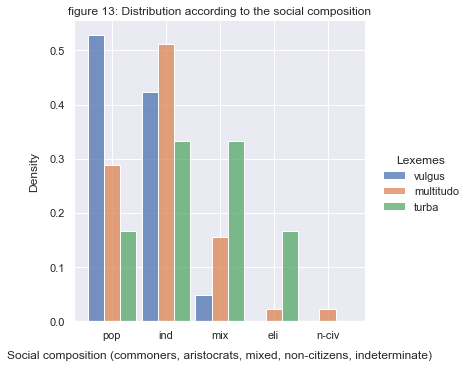

In [44]:
fig13 = sns.displot(noms_foule_df, x="social_composition", stat="density", hue="lemma", multiple="dodge", common_norm=False, shrink=.9)
fig13.set_axis_labels("Social composition (commoners, aristocrats, mixed, non-citizens, indeterminate)", "Density", labelpad=10)
fig13.legend.set_title("Lexemes")
plt.title("figure 13: Distribution according to the social composition")

In [45]:
p_value_test(noms_foule_df["lemma"], noms_foule_df["social_composition"])

P-value for these variables is __2.1423586471502887e-07__.

With`p<0.0001`, we can affirm that there is a statistically significant relationship between the lemma and the social composition of the crowd.

_Analysis_: The criterion of the sociological composition of the crowd seems to be the most decisive so far to discriminate between the three lexemes. _multitudo_ and even more _turba_ are frequently used to refer to heterogeneous gatherings, where commoners and aristocrats mingle with one another indiscriminately, especially in crisis periods. _Vulgus_ is never explicitly used to describe these phenomena and mostly refers to “popular” crowds, that is crowd of plebeians, in Rome (<cite data-cite="2272257/9D9AZDPV"></cite> p. 177), or crowd of “common soldiers” (_gregarii milites_, Tac., _Hist._, 1.36.3, 1.46.4, 3.31.2), distinguished from the prefects and the legates (Tac., _Hist._, 2.70.5, 4.36–37, 4.57, _Ann._, 1.49.2), from the tribunes and the centurions (Tac., _Hist._, 1.36.3, 1.80.2, 2.5.4, 3.31.2, _Ann._, 1.17–18, 2.55.5),  and even sometimes from the “junior officers” below centurion rank, the _principales_, soldiers on higher pay with special duties, and thus standing out from the pack of common soldiers (Tac., _Hist._, 1.25.2, see a more thorough analysis of this point in <cite data-cite="2272257/S3N9BDMT"></cite> pp. 98-99).

To take the example of the crisis of the 15 January 69 AD, when Otho carried out a coup in Rome against Galba, the legitimate emperor, Tacitus mentions a first crowd movement caused by the (false) news of Otho’s death: a euphoric crowd formed in front of the imperial palace and forced the doors to congratulate Galba. Tacitus particularly insists on the social diversity of this crowd, composed by “not the people only and the ignorant mob […] but many of the knights and senators as well” (_non populus tantum et imperita plebs [...] sed equitum plerique ac senatorum_, Tac, _Hist._, 1.35.1), and ends up calling it an _inruens turba_ (an “inrushing crowd”): _turba_ here undoubtedly refers to a (socially) mixed crowd, with citizens belonging to the highest orders and commoners. A few hours later, after Galba’s death and Otho’s victory, a crowd of the same social diversity forms in an undetermined place (the forum?) to deplore the dramatic turn of events. _Vulgus_ appears in this second passage, not to designate this heterogeneous gathering of citizens (therefore in contrast to _turba_), but to refer to its popular component alone. It is thus superimposed on the _populus_ et _plebs_ of the former passage of Tac., _Hist._, 1.35.1. See in Tac., _Hist._, 1.50.1: “Then [the thought of the civil war] […] caused open grief not only to the senators and knights who had some share and interest in the state, but even to the common people (_vulgus_).” (_Tum [...] non senatus modo et eques, quis aliqua pars et cura rei publicae, sed __vulgus__ quoque palam maerere_, Tac, _Hist._, 1.50.1) The proximity of the two passages makes clear the sociological difference between _turba_ and _vulgus_ in Tacitus’ mind, and it is misleading to state that _vulgus_ could refer to any form of “foule mêlée” in his works (_pace_ <cite data-cite="2272257/GJAK9283"></cite> pp. 29 & 74 or <cite data-cite="2272257/CXIXUP3N"></cite> pp. 86-88).

The graph of [fig. 13](figure-13) shows the numerical importance of the occurrences for which it is impossible to specify further the social composition of the crowd. However, it is also significant that the lexemes chosen by Tacitus when he refers to crowds composed exclusively of noble citizens or non–citizens (labels `eli` and `n-civ`) are exclusively _multitudo_ and _turba_, and that _vulgus_ never appears in these sense. We may thus infer that neither _turba_ nor _multitudo_ were associated, for Tacitus, with a specific sociological profile, unlike _vulgus_, which was strictly associated to the sub-equestrian segments of the civic body (in Rome or elsewhere). Compare in contrast, a few chapters apart, the _turba populi_ (“crowd of commoners”) of Tac., _Hist._, 2.88.3 with the _turba nobilium_ (“crowd of nobles”) of Tac., _Hist._, 2.92.2. Conversely, expressions such as _vulgus populi_ or _vulgus nobelium_ never appear in Tacitus, and sound odd to anyone familiar with Tacitus’ writing.

To go further, let us investigate the cases where _turba_ and _multitudo_ refer to crowds composed of the Roman elite or of non-citizens:

In [46]:
for index, content in noms_foule_df[(noms_foule_df["social_composition"] == "eli") | (noms_foule_df["social_composition"] == "n-civ")].iterrows():
    printmd(highlight_lex("__%s__ : _%s_(\"%s\")\n" %(content["ref"], content["sentence"], content["translation"])))

__Ann. 6.16.3__ : _sed tum Gracchus praetor, cui ea quaestio evenerat, __multitudine__ periclitantium subactus rettulit ad senatum, trepidique patres (neque enim quisquam tali culpa vacuus) veniam a principe petivere_("In the present instance, however, the praetor Gracchus, to whose jurisdiction the case had fallen, was forced by the numbers implicated to refer it to the senate: and the Fathers in trepidation-for not one member was clear from such a charge-asked an indulgence from the prince.")


__Ann. 13.18.3__ : _ac ne coetu salutantium frequentaretur, separat domum matremque transfert in eam, quae Antoniae fuerat, quotiens ipse illuc ventitaret, saeptus __turba__ centurionum et post breve osculum digrediens_("That her levees should not be frequented by a crowd of visitants, he made his own establishment separate, installed his mother in the house once belonging to Antonia, and, at his visits to her new quarters, came surrounded by a throng of centurions and left after a perfunctory kiss.")


__Hist. 1.33.2__ : _et praeclarum in servis auxilium si consensus tantae __multitudinis__ et, quae plurimum valet, prima indignatio elanguescat_("It was a brilliant backing, too, that they would find in slaves, if the united sentiment of the whole people and their first indignation, which is the strongest, should be allowed to cool!")


__Hist. 2.92.2__ : _nec eo segnius invaserant domos hortos opesque imperii, cum flebilis et egens nobilium __turba__, quos ipsos liberosque patriae Galba reddiderat, nulla principis misericordia iuvarentur_("This had not, however, made them slow to seize houses, gardens, and the wealth of the empire, while a pathetic and poverty-stricken crowd of nobles, whom with their children Galba had restored to their native city, received no pity or help from the emperor.")


__Agr. 40.4__ : _ac ne notabilis celebritate et frequentia occurrentium introitus esset, vitato amicorum officio noctu in urbem, noctu in Palatium, ita ut praeceptum erat, venit: exceptusque brevi osculo et nullo sermone __turbae__ servientium inmixtus est_("And in order that his entrance into the city might not excite note by the concourse and bustle of a reception, he eluded the demonstrations of his friends, arrived by night, and by night repaired to the palace, in accordance with instructions. With the greeting of a hasty kiss, and without conversation, he slipped away into the obsequious mob.")


In most cases, the sociological characterization of the crowd is done with an objective genitive that specifies the social origin of its components, with the exception of Tac., _Hist._, 1.33.2, where it is done with the adverbial phrase _in seruis_ (“among slaves”). In contrast, _vulgus_ is much more “intransitive” than _turba_ and _multitudo_, and is much more used as possessive of a noun (_fauor vulgi_, “the favour of the crowd”; _studia vulgi_, “the inclination of the crowd”; _rumor vulgi_, “the rumour of the crowd”...) than it is itself determined by another term. 

The detailed analysis of lexical echoes is enlightening on the near-synonymy of _vulgus_ and the “institutional” vocabulary referring to the common people (_populus_, “the common people”; _plebs_, “the plebs”). For stylistic reasons – to avoid repetition or to produce a form of copia – Tacitus is often led to use _vulgus_, _populus_ and/or _plebs_ as synonyms, which clearly shows that _vulgus_ was the lexeme closest in his mind to the traditional terms referring to the Roman people (on these lexical connections, see <cite data-cite="2272257/43U2KCKU"></cite>, p. 148-149). Several passages go so far as to present the three lexemes _populus_, _plebs_ and _vulgus_ together (already before Tacitus, see Stac., _Theb._ , 1.168–170). The most revealing text is the report of Germanicus’ triumph in 17 AD. Tacitus slips into the narrative of this highly positive event a srong dysphoric foreshadowing of Germanicus’ imminent death (Tac., _Ann._, 2.41.3):

> _Sed suberat occulta formido, reputantibus haud prosperum in Druso patre eius __fauorem uulgi__, auunculum eiudem Marcellum fragrantibus __plebis studiis__ intra iuuentam ereptum, breuis et infaustos __populi Romani amores__._

> Yet beneath lay an unspoken fear, as men reflected that to his father Drusus __the favour of the multitude__ had not brought happiness—that Marcellus, his uncle, had been snatched in youth from __the ardent affections of the populace__—that __the loves of the Roman nation__ were fleeting and unblest!

_Analysis_: This very elaborate passage brings together three synonymous phrases (_favor vulgi_, “the favour of the multitude”; _plebis studia_, “the affections of the populace”; _populi Romani amores_, “the loves of the Roman people [rather than nation]”) and allows us to infer a double equivalence _favor_-_studia_-_amores_ and _vulgus_-_plebs_-_populus_. The stylistic effect is only possible because the _vulgus_ is, by definition, a popular crowd.

Other forms of synonymy could be investigated here, for example the frequent use of the hendiadys (a figure of speech in which two words referring to the same reality are linked by a conjunction). The opuscules and the first book of the Histories contain numerous hendiadyses related to the social stratification of the common people of Rome. _populus et plebs_ (“the people and the _plebs_”) for instance occurs in a small number of occurrences in the preserved Latin literature, mainly in Tacitus (cf. <cite data-cite="2272257/43U2KCKU"></cite> p. 149) and already in Cicero (cf. <cite data-cite="2272257/G9Z3USM2"></cite> pp. 31–33). _Vulgus et populus_ (“the crowd and the people” = “the crowd of the people”) appears three times in Tacitus’ early works (Tac., _Dial._, 7.3, _Agr._, 43.1 and _Hist._, 1.89.1). In these phrases, it is impossible to analyse _vulgus_ and _populus_ as referring to two distinct realities, since the group the historian is talking about is characterized before or after the passage by a simple _vulgus_ (Tac., _Agr._, 41.4) or by _plebs_ (Tac., _Hist._, 1.89.1). Without going further into this matter, which we propose to deal with [elsewhere](https://www.msh-alpes.fr/actualites/populi-nomen-nommer-peuple-romain-en-latin-et-en-grec), it seems that the hendiadys _vulgus et populus_ allows Tacitus to provide two complementary perspectives on the same object, the common people of Rome (see further interpretation below, section 4.2).

#### Degrees of spatialization

Text(0.5, 1.0, 'figure 14: Distribution according the degree of spatialization')

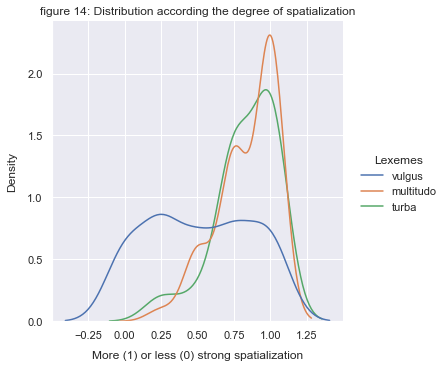

In [47]:
fig14 = sns.displot(noms_foule_df, x="spatialisation", kind="kde", hue="lemma", common_norm=False)
fig14.set_axis_labels("More (1) or less (0) strong spatialization", "Density", labelpad=10)
fig14.legend.set_title("Lexemes")
plt.title("figure 14: Distribution according the degree of spatialization")

In [48]:
p_value_test(noms_foule_df["lemma"], noms_foule_df["spatialisation"])

P-value for these variables is __4.863773454544251e-06__.

Here again, the very small p-value (`p<0.0001`) proves the statistical significance of the results.

_Analysis_: The study of the distribution according to the degree of spatialization of the crowd provides convincing results to discriminate between the three lexemes. Indeed, while this is not a decisive criterion for understanding the distribution of _vulgus_ in the Tacitean corpus, _turba_ and even more _multitudo_ are strongly associated with clearly spatialized crowds, _ie_ crowds whose inscription in a given place (and time) is an important definitional feature. This observation is consistent with the one made above on the semantics of the collocates of these two lexemes (see above, section 3.2.1).

Besides, this spatial criterion is hardly satisfactory to account for the occurrences of _vulgus_. Very often in Tacitus, the _vulgus_ is a crowd whose behaviour is inscribed in a very loose spatial or temporal framework. A revealing example is given by the crowd (_vulgus_) that longs for Agricola to take new military responsibilities after his retirement from public life (Tac., _Agr._, 41.4). In his narrative, Tacitus summarizes events that occurred in Rome over the course of several years:

> _Ita cum damna damnis continuarentur atque omnis annus funeribus et cladibus insigniretur, __poscebatur ore uulgi dux Agricola__, comparantibus  cunctis uigorem, constantiam et expertum bellis animum cum inertia et formidine aliorum._

> Accordingly, when loss was added to loss, and every year was signalised with death and disaster, __the voice of the people began to ask for Agricola’s generalship__: everyone compared his firmness, energy, and experience with the lethargy and panic of the generals.

Thus, in most of the passages where rumours or demands of this Roman _vulgus_ are mentioned, the spatial inscription of the crowd is so to speak non–existent. The Tacitean _vulgus_ often falls into one of the categories of the Stoic ontology, namely the _distantia corpora_, entities built up of distant, non-continuous elements, as opposed to _continua corpora_ (entities made up of a single piece) and _composita corpora_ (entities built up of heterogeneous, but continuous elements). Seneca thus contrasts the human body (_corpus continuum_), a ship (_corpus compositum_) and human groups such as the Senate, the army or the people (_corpus ex distantibus_) in a letter to Lucilius (Sen., _Epist._, 102.6, see on the philosophical background here <cite data-cite="2272257/SG5E8L26"></cite> pp. 63-69; many thanks to Fabien Pepino for drawing my attention to these notions). Admittedly, _vulgus_ is also used by Tacitus to refer to the public of spectacles, assemblies (_contiones_), especially military ones, and other specific places, all of which have in common that they had become spaces of communication and interaction between the Roman plebs and the political (imperial) power, as we will see below (section 4.2). In these cases, however, Tacitus almost never puts the focus on the spatialization of the crowd, as the collocates of _vulgus_ generally belong to the semantic field of opinion and speech (see above, section 3.2.1). Unlike _turba_ and _multitudo_, the criterion of spatialization clearly appears as incidental to defining what _vulgus_ is in the eyes of the historian.

As is often the case, the passages combining several of the lexemes studied are most telling. For instance, during Vitellius’ desperate conscription at the end of the civil war of 69 AD, Tacitus distinguishes between the _vulgus_, synonymous with _populus_, to refer to the crowd proclaiming its support for the emperor in a unspecified place and time, and the _multitudo_, which rushes into the _comitia tribute_ on the day of the conscription, where the multitude “overflew” the place (_superfluente multitudine_). The opposition between a strongly spatialized crowd (_multitudo_) and an undefined, almost “uncircumstanced” crowd (_vulgus_) speaks for itself (Tac., _Hist._, 3.58):

> _Ipse aeger animi studiis militum et __clamoribus populi__ arma poscentis refovebatur, dum __vulgus ignavum__ et nihil ultra verba ausurum falsa specie exercitum et legiones appellat. Hortantibus libertis (nam amicorum eius quanto quis clarior, minus fidus) vocari tribus iubet, dantis nomina sacramento adigit. __Superfluente multitudine__ curam dilectus in consules partitur; servorum numerum et pondus argenti senatoribus indicit._

> He himself was sick at heart, but the enthusiasm of the soldiers and __the shouts of the people__ demanding arms gave him fresh spirit, while he addressed __the cowardly rabble__, whose courage would not extend beyond words, under the unreal and pretentious names of an army and legions. On the advice of his freedmen (for the more distinguished his friends were, the less he trusted them), he ordered the people to assemble in tribes, and administered the oath to the members as they enrolled. __Since the numbers were too great__, he divided between the consuls the selection of the recruits. On the senators he imposed a contribution of slaves and cash.

#### Degrees of political agency

Text(0.5, 1.0, 'figure 15: Distribution according to the degrees of political agency')

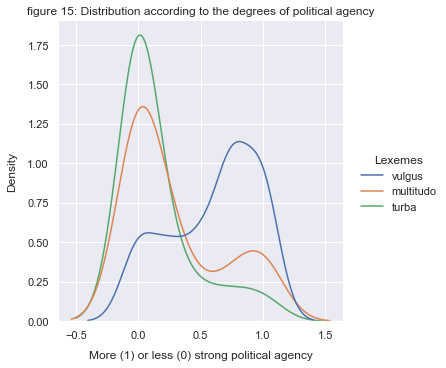

In [49]:
fig15 = sns.displot(noms_foule_df, x="political_agency", kind="kde", hue="lemma", common_norm=False)
fig15.set_axis_labels("More (1) or less (0) strong political agency", "Density", labelpad=10)
fig15.legend.set_title("Lexemes")
plt.title("figure 15: Distribution according to the degrees of political agency")

In [50]:
p_value_test(noms_foule_df["lemma"], noms_foule_df["political_agency"])

P-value for these variables is __3.5295149525271796e-07__.

With `p<0.0001`, we can ascertain that there is a statistically significative relationship between the choice of a lemma by Tacitus and the political action of the crowd in our corpus.

_Analysis_: This last criterion also proves to be of primary importance in a contrastive perspective. _vulgus_ seems preferred as the represented crowd gains agency and steps up its political demands. Conversely, _turba_ and _multitudo_, in similar proportions, are mostly used for quiet and non-politicized crowds. A few examples should allow us to see how these general observations are anchored in the more detailed analysis of Tacitus’ text.

It is well known that ancient historiography does not focus on everyday practices, which ancient historians considers unworthy of serious attention. However, it should be stressed that in the two passages in which Tacitus refers to the everyday masses swarming in the streets of Rome, he uses _turba_ (_Hist._, 2.88.3) and _multitudo_ (_Hist._, 1.75.3). In this case, the crowd considered is a transient group of individuals whose common presence in the same place at the same time is only circumstantial. The same two lexemes appear to refer to “professional crowds”, _ie_ groups of individuals constituted for the exercise of a corporate or professional activity and politically insignificant, _eg_ the “crowd of devotees” (_turba sacricolarum_, _Hist._, 3.74.1), a gathering constituted by priests of Isis who transport the objects of the Isiac cult from the Campus Martius to the other side of the Tiber. It is also noticeable that _multitudo_ is mostly chosen to describe politically or institutionally important crowds, but passive (_eg_ _Hist._, 4.81.3) or lacking political autonomy (most notably the crowds following a patron, _eg_ _Ann._, 4.41.3, 13.14.1). To cite a representative example, when Germanicus goes to Artaxata in 18 AD to crown the pro-Roman prince Zeno-Artaxias king of Armenia, the historian emphasizes the new ruler’s favour with both the nobility (_proceres_) and the people (_plebs_). The coronation scene itself enlightens this rare concord. The people appear as _multitudo_, but are depicted as a most passive crowd (_Ann._, 2.56.3):

> _Igitur Germanicus in urbe Artaxata adprobantibus nobilibus, __circumfusa multitudine__, insigne regium capiti eius [ie Zenonis] imposuit._

> Accordingly, in the town of Artaxata, before the consenting nobles and __a great concourse of the people__, Germanicus placed on his head the emblem of royalty.

_Analysis_: The active and decisive support of the “consenting noblemen” (_adprobantibus nobilibus_) is followed by the passive and symbolic support of the “crowd around” (_circumfusa multitudine_), which has no say in the matter, but is presented from the perspective of spatiality and number; it assumes a figurative function, which is certainly important in the political ritual, but lacks any effective weight.

In contrast, the _vulgus_ is a crowd whose raison d’être is almost always political and, above all, which exists through political action. We have seen above that collocates of _vulgus_ implies the existence of a common opinion (_studium_, _favor_, _credere_, _rumor_...), shared feelings (_ira_, _gaudium_, _maerere_...), and collective vocalization (_sermo_, _clamor_, _uox_, _adstrepere_, _appellare_, _iactare_...). The _vulgus_ thus has something to say and to demand. From the rumours that circulate in the streets of Rome to the shouts let out during circus games and other entertainments, the _vulgus_ is not satisfied with a walk-on part like the _multitudo_ mentioned earlier, but strives to take a genuinely participatory part in the political field: it subverts the political structures and takes advantage of any opportunity to assert its interests – in a word, it expresses collective agency.

### Summary

#### Discrimination of the three lexemes

In order to summarize the conclusions reached by this journey through Tacitus’ vocabulary of the crowds, a passage where all three lexemes appear can be quoted. In this text, Tacitus casts a light on Sejanus’ intrigues to corrupt Tiberius (Tac., _Ann._, 4.41.1-3):

> _Rursum Seianus non iam de matrimonio sed altius metuens tacita suspicionum, __vulgi rumorem__, ingruentem invidiam deprecatur. Ac ne adsiduos in domum coetus arcendo infringeret potentiam aut receptando facultatem criminantibus praeberet, huc flexit ut Tiberium ad vitam procul Roma amoenis locis degendam impelleret. Multa quippe providebat: sua in manu aditus litterarumque magna ex parte se arbitrum fore, cum per milites commearent; mox Caesarem vergente iam senecta secretoque loci mollitum munia imperii facilius tramissurum: et minui sibi invidiam adempta __salutantum turba__ sublatisque inanibus veram potentiam augeri. Igitur paulatim negotia urbis, populi adcursus, __multitudinem adfluentium__ increpat, extollens laudibus quietem et solitudinem quis abesse taedia et offensiones ac praecipua rerum maxime agitari._

> In rejoinder, Sejanus—now alarmed not for his marriage but on deeper grounds—urged him to disregard the still voice of suspicion, __the babble of the multitude__, the attacks of his maligners. At the same time, unwilling either to enfeeble his influence by prohibiting the throngs which besieged his doors or to give a handle to his detractors by receiving them, he turned to the idea of inducing Tiberius to spend his days in some pleasant retreat at a distance from Rome. The advantages, he foresaw, were numerous. Interviews would lie in his own bestowal; letters he could largely supervise, as they were transmitted by soldiers: before long, the Caesar, who was already in the decline of life and would be rendered laxer by seclusion, would be readier to transfer the functions of sovereignty; while his own unpopularity would diminish with the abolition of __his great levées__, and the realities of his power be increased by the removal of its vanities. Little by little, therefore, he began to denounce the drudgeries of the capital, its jostling crowds, __the endless stream of suitors__, and to give his eulogies to quiet and solitude, where tedium and bickering were unknown and a man’s chief attention could be centred on affairs of first importance.

Tacitus begins by stating that the praetorian prefect is alarmed by "the rumour of the crowd" (_vulgi rumor_): _vulgus_ thus designates a very large group, with few details on its concrete manifestation, a group able to make heard its opinion, which exerts a real constraining power over Sejanus. _turba_ and _multitudo_ refer to narrower segments of the Roman population and characterize gatherings within a well determined context. The _turba_ refers to the crowd that turned up for the official morning visit to the prince (_salutatio_) – thus presumably mostly composed of noble citizens (see <cite data-cite="2272257/S4FGYPRX"></cite> pp. 122-125 and <cite data-cite="2272257/4TV8R2MT"></cite> pp. 178-180 on this topic) –, while the _multitudo_ refers to the random crowds that formed around the emperor when he travelled through the city (see <cite data-cite="2272257/XFXQMRFZ"></cite> p. 228 on Tac., _Ann._, 4.41.3 with references to Tac., _Ann._, 2.34.3). Admittedly, both the imperial _salutatio_ and the emperor’s walkabout in the city have a political relevance, but more on a symbolic than on a really effective level, and above all they encapsulate top-down rather than bottom-up political practices. We should also note the syntactic variation between _vulgus_, which performs a determinative function and specifies the word “rumour” in the form of a possessive genitive (_rumor vulgi_), and, in contrast, _turba_ and _multitudo_, which are themselves specified through a determinative, in both cases a nominalized participle (_turba salutantum_, _multitudo adfluentium_). The determination of _turba_ and _multitudo_ through a nominalized participle in the form of a possessive genitive is recurrent in Tacitus (_Agr._, 40.4, _Ann._, 3.1.3, 6.16.3, 13.14.1), and can be read as a way to specify the referent of these so to speak  “floating signifier”, while associating them with precise circumstances. In fact, once the _salutatio_ or the encounter with Tiberius in the streets of Rome is over, the crowd, whether _turba_ or _multitudo_, is likely to break up, whereas the _vulgus_ that circulates rumours overlaps (at least in Tacitus’ mind) with the urban _plebs_ as a whole, and does not seem solely linked to this particular occasion – the best evidence being that the same _vulgus_ reappears a few paragraphs later (Tac., _Ann._, 4.64.1).

#### The semantic perimeter of _vulgus_, a Tacitean innovation? A comparison with Suetonius and Ammianus

Can we determine Tacitus’ originality in this particular use of _vulgus_? Although it is difficult to draw definitive conclusions without a comprehensive reading and analysis of parallel corpora, some selected comparisons with Tacitus’ predecessors, contemporaries and successors suggest that the historian made a quite original use of this lexeme, which one may link to his political analysis of the first principate.

First of all, it should be noted that the very particular meaning Tacitus gives to _vulgus_ (defined as a popular, politically active crowd, stating its opinion) is not unparalleled in the surviving Latin literature, but that the systematization of this definition is to our knowledge unprecedented. Indeed, from Sallust to Seneca, many authors give to _vulgus_ the meaning of “mingled crowd” where the social orders and traditional distinctions are confused (Sall., _Cat._, 20, or Sen., _Vit. Beat._, 2.2 with the commentary of <cite data-cite="2272257/43U2KCKU"></cite> p. 150 n. 4), alongside those who give _vulgus_ a clear “popular” colour (see for example the above mentioned case of the hendiadys _populus and vulgus_ in Cic., _Mur._, 38, Cic., _Verr._, 2.1.1, Lucius Pomponius Bononiensis _apud_ Non. 3.750, and later Sen., _Phaedr._, 488). In some earlier poets and prose writers, a distinction is made between the _turba_ as a mixed crowd of all classes and the _vulgus_ as the infra-equestrian part of it, as P. Arena has shown in relation to Ovid, Seneca or Statius <cite data-cite="2272257/H2UPRPIW"></cite>. However, this definition of the _vulgus_ is more fluctuating, for instance in a passage of Manilius in which the _vulgus_ and the _sine nomine turba_ (“nameless crowd”) designate the non-citizen fringes of the city, placed below the _populus_ itself (Man. 5.733).

##### Suetonius

In Suetonius, a contemporary of Tacitus who deals with the same historical material in a different genre (the biography), the most used lexeme is also _vulgus_ (32 occ.), which, as in Tacitus, constitutes a singularity in relation to the previous literary production. However, the term does not have quite the same semantic extension as in Tacitus. We do find a number of passages in which the Suetonian _vulgus_ designates the crowd as a new political actor of the imperial regime, as a type of manifestation of the urban _plebs_ and as a participant in the dialogue with the prince (Suet., _Aug._ 45, _Claud._, 21, _Ner._, 21; link to rumours: _Iul._, 30, _Tib._, 7, _Ner._, 6 and 53, _Oht._, 12; link to opinion: _Iul._, 88, _Ner._, 4, 36 and 53, _Vesp._, 14). Notwithstanding these occurrences, _vulgus_ often refers to a socially indeterminate group and is often alluded to as the circles that circulate licentious verses or witty comments about the emperors (_Iul._, 20, 80, _Tib._, 21, _Ner._, 42, _Vesp._, 16). One thus often finds as collocates of this _vulgus_ verbs referring to phonetic or lexical variants of certain nouns (_dicere_, _vocare_: _Aug._, 35, 70, 87, _Tib._, 38, 43, _Galb._, 14, _Vesp._, 4), while the verbal phrase _in vulgus_/_vulgo edere_/_exire_ (which can be translated as “to divulge”) is found several times. In these cases, _vulgus_ lacks the strong social colour it had in Tacitus. Furthermore, the parallel between the _vulgus urbanum_ (“urban crowd”) and the _vulgus militum_ (“military crowd”) is totally absent in Suetonius (in contrast to Tacitus), who never applies the noun to the military world, when he does not distinguish the civic and the military spheres most firmly (_eg_ _Ner._, 31).

_Turba_ is used to nearly the same extent to _vulgus_ (28 occ. in the sense of "crowd"), which makes a real difference with Tacitus. The term does not seem to have a strong social profile, since it refers sometimes to the Roman _plebs_, who attends the games or is entitled to the grain distributions (games : _Iul._, 29, _Aug._, 40, _Cal._, 30, _Claud._, 12, 27; frumentary context: _Claud._, 18; around the curia: _Cal._, 14; see also _Cal._, 4 and _Galb._, 18), sometimes to socially more diverse groups: senators, barbarians, slaves and soldiers (nobles: _Aug._, 35, _Claud._, 10, _Galb._, 17, _Vit._, 7; outside Rome / barbarians: _Aug._, 98, _Ner._, 30; slaves : _Claud._, 18 and 22; soldiers: _Aug._, 14, _Ner._ 2; in contrast, see two occurrences of _turba_ paganorum, “crowd of civilians”: _Aug._, 27 and _Galb._, 19). The absence of a socially situated conceptualisation of the Suetonian _turba_ is evident in the passages where _turba_ refers to a mingled crowd, a _turba omnis generis_ (“crowd of all ranks”, _Cal._, 42) and, more generally, can be seen with the omnipresence of collocates in the genitive plural form, specifying to which kind of crowd the biographer refers to (_turba paganorum_, _creditorum_, _salutantum_, _familarum_, _operariorum_, etc.). These expressions underline the indeterminacy of this _turba_, which generally presents, as in Tacitus, a spatialized image of the crowd, and collocates with verbs of motion like _circumstare_, _dimouere_, _summovere_, etc.

In spite of a smaller number of occurrences (12), _multitudo_ also relates to various crowd phenomena: in addition to being used in more than a third of the cases for inanimate collections (_Iul._, 68, _Aug._, 29, _Ner._, 31 and 46, _Tit._, 4), _multitudo_ refers as much to crowds without any claim of their own or without any homogeneous social profile as to the Roman plebs putting forward political demands (_Iul._, 16, _Aug._, 46, _Tib._, 72, _Claud._, 10).

##### Ammianus

In Ammianus (a fourth century AD historian writing a continuation of Tacitus’ history), the distribution of lexemes is strikingly different. With 100 occurrences in which it actually designates human crowds, against 26 occurrences of inanimate collections, _multitudo_ seems to be the term favoured by the historian to evoke crowd phenomena. The sheer volume of occurrences prevents any detailed study here, but we can highlight the diversity of crowd phenomena evoked by this noun: both urban and military crowds, Romans as well as barbarians, nobles as well as commoners. The high frequency of modifiers in the form of an explicative genitive (_multitudo calonum_, _pelicum_, _servorum_...) as well as expressions like _promiscua multitudo_ (“mixed crowds”, “crowds without distinction”, Amm. 14.3.3, 19.6.1, 23.2.4) attest to this observation. The insistence on the physical dimension of the gathering is frequent, for instance through collocates such as _cogere_ (“bring together”) or _circumsaepire_ (“enclose”), and more generally verbs with prefixes _cum-_ and _circum-_ (Amm. 14.3.3, 16.10.4, 16.12.29, 18.2.8, 18.6.22, etc.).

_Turba_ is mostly used in the plural form in its original sense of “trouble”, in noun phrases like _concitor _turbarum_ (“troublemaker”, Amm. 14.7.15, 15.1.2, 15.7.5, 17.9.5, 19.4.6, etc.). The meaning of “crowd” is present in only 6 occ.; in this cases, _turba_ may refer to the lower end of the social scale, like the _turba imae sortis et paupertinae_ of Amm. 14.6.25 (“crowd of lowest condition and greatest poverty”), but this social meaning occurs quite infrequently (compare Amm. 19.11.11, 21.10.1, 22.9.16, 23.6.83). With such a small number of relevant passages, it is difficult to reach general conclusions about Ammianus’ use of _turba_.

The occurrences of _vulgus_ are also rather scarce in Ammianus (14 occ.). As in Suetonius, the term is likely to refer to large (and vague) segments of the population, especially when associated with verbs (_appellare_, _pronuntiare_) indicating popular variants of a word or pronunciation differences (Amm. 17.8.2, 22.4.9, 23.1.5; also 29.2.6). Apart from these cases, it is true that _vulgus_ seems to have retained a clear social colour and characterizes collective actions taken together by the urban plebs (in Rome or in the major cities of the 4th century Roman Empire like Antioch or Milan) or by the legions (_vulgus_ referring to the _plebs frumentaria_ in Amm. 14.6.1; _vulgus_ as the infantry in Amm. 16.12.49). As in Tacitus, _vulgus_ is sometimes used to refer to particular sectors of public opinion (Amm. 23.6.4, 25.4.18). It is also worth noting that _vulgus_ often appears in contexts of sedition, especially in urban settings (a clear link between _seditio_ and _vulgus_ is made in Amm. 14.6.1). In these cases, _vulgus_ may be used alongside _plebs_ and _multitudo_. In Amm. 14.7.5-6, a wheat riot begins within the plebs (_plebs_) of Antioch: the rioters are referred to as _multitudo_ when they confine themselves to rumble, and as _vulgus_ when the revolt breaks out. However, unlike in Tacitus, the _vulgus_ usually appears as the social conflict is over, when some authority has calmed the crowd by appealing to their pity. The main actor in such events is usually the _plebs_, sometimes referred to as _multitudo_ when they start rioting, then as _vulgus_ when they settle down. This lexical sequence can be read, for example, in the narrative of the 355 AD seditions in Rome, suppressed by the urban prefect Flavius Leontius (Amm. 15.7). The choice of _vulgus_ can be explained in these cases by its strong psychological dimension in general, and by the stereotypical affectivity of the masses in particular (see also Amm. 19.10.1-3, 30.8.9 and 31.5.7).

Thus, Suetonius appears relatively close to Tacitus, especially in his use of _vulgus_, whereas in Ammianus, as in general in Latin literature, this term is very much in the minority compared to _multitudo_ and _turba_. The differences between Tacitus and Suetonius can be explained by the latter’s less rigorous choice of lexemes to describe crowd action, or (perhaps more convincingly) by the biographical genre, in which the focus is put on urban life (hence the scarcity of military crowds). In these three authors, _vulgus_ is clearly identified with the infra-equestrian classes of Roman society, and is associated with the expression of collective opinion.

## Interpreting the results from a historical perspective: the Tacitean _vulgus_, a new imperial phenomenon?

Tacitus’ use of the three lexemes must be read in association with the diversity of crowd phenomena that occurred in the first century AD Rome. In this historical context, the historian specializes _vulgus_ to refer to a type of crowd closely linked to the Roman plebs, defined by a collective opinion, capable of vocalizing it and, more generally, of stating its political demands – in short, a crowd that thinks and speaks. We have also seen above that Tacitus made a quantitatively important use of _vulgus_, superior to the previous literary production. In the final part of this paper, we propose to investigate this Tacitean originality from a more historical perspective. Two possible, not mutually exclusive interpretations might be advanced: the psychological nature of Tacitus’ writing and the evolution of the political relations within the Roman society of the 1st century AD.

### _Vulgus_ and the psychological reading of collective action

Because of its potential origin in the rural language, and at the very least because of the nominal suffix -us and the neutral gender, _vulgus_ carries strong psychological connotations, allowing for broad generalizations about the gregarious nature of the crowd. The term must thus be apprehended within Tacitus’ broader tendency towards socio-psychological interpretation of the historical events, which is particularly clear if we look at the regular references in his works to the mos vulgi, the “habits” or even the psychological “laws of the crowd” (<cite data-cite="2272257/GJAK9283"></cite> p. 707; <cite data-cite="2272257/IHMSQ2V3"></cite> pp. 226-237; see <cite data-cite="2272257/S3N9BDMT"></cite> pp. 81-87 for a comprehensive survey). This set of rules allows the historian to explain crowd behaviour by invariants of psychic nature: crowds, whatever they are, are always unable to control themselves, fickle, prone to believe in the worst possible stories, gullible, etc. As such, the term is applied to diverse social groups – the Roman plebs, the legions, the common people of the _municipia_ and the “barbarian” tribal populations –, all of which are subsumed under the general denomination of _vulgus_. Tacitus thus conflates in the same category the _vulgus urbanum_ (“urban crowd” in Rome, the _Vrbs_ _par excellence_, Tac, _Hist._, 3.80.1), the _vulgus militum_ (“military crowd”, Tac., _Ann._, 3.13.2, _Hist._, 2.5.4 and 2.70.5), the _vulgus municipale_ (“municipal crowd”, “crowd of the town”, Tac., _Hist._, 2.21, in Piacenza) and the _vulgus oppidanorum_ (“provincial crowd”, with the same meaning of “crowd of the town”, Tac., _Ann._ 15.33.3, here in Naples). It is obvious that these groups have different social composition, privileges, powers and obligations. However, in Tacitus’ mind (and in the mind of any Roman aristocrat, one may add), each one of them forms an entity with similar characteristics (they are composed of non-noble freemen), whose behaviour, in a given situation, is unlikely to vary. 

Some occurrences of _vulgus_ used concurrently with _populus_ and _plebs_ show this difference between the political (_populus_, _plebs_) and the psychological vocabulary (_vulgus_). In a digression about Rome’s republican past, for example, Tacitus alludes to the ancient powers of the _plebs_ (_plebs_): the chosen term can be explained by the reference to the secessions of the _plebs_ in the early days of the Republic. In the very next phrase, when referring to the “character” (natura) of this group, Tacitus uses _vulgus_, a term more suited to his psychological approach (_Ann._ 4.33.2):

> _Igitur ut olim __plebe ualida__, uel cum patres pollerent, noscenda __uulgi natura__ et quibus modis temperanter haberetur, senatusque et optimatium ingenia qui maxime perdidicerant, callidi temporum et sapientes credebantur, sic conuerso statu […]._

> Accordingly, as in the period of alternate __plebeian dominance__ and patrician ascendancy it was imperative, in one case, to study __the character of the masses__ and the methods of controlling them: while, in the other, those who had acquired the most exact knowledge of the temper of the senate and the aristocracy were accounted shrewd in their generation and wise; so today, when the situation has been transformed,[...]

Similar distinction might be observed elsewhere: see _Ann._ 14.14.2 or the hendiadys _vulgus quoque imperitum et tunicatus hic _populus_ (to translate it literally: “the ignorant crowd and our people clothed with the tunic”, _Dial._, 7.3). In all of these cases, _vulgus_ and _populus_/_plebs_ refer to the same group, seen from two different (and complimentary) perspectives, one psychological, and one political or institutionnal.

### _Vulgus_ and the political transformations of the first principate

Nevertheless, it would be wrong to limit ourselves to this first analysis, since the _populus_ and the _plebs_ are often involved in Tacitus in psychologizing generalizations, and the distribution is sometimes the opposite of what one would expect (_eg_ in Tacitus, Ann, 2.82.3, well noted in <cite data-cite="2272257/43U2KCKU"></cite> pp. 146 _sqq_). The reason why Tacitus has systematized the use of the notion of _vulgus_ is undoubtedly also because it belongs fully to the political picture he draws on the early imperial Rome. We may start here by quoting a most revealing text. At the beginning of Otho’s reign in the first months of 69 AD, the people “obtained” (_impetrare_) the death of Tigellinus, Nero’s former praetorian prefect and favourite, protected under Galba by the powerful Titius Vinius. As he describes the collective mobilization that led to his downfall, Tacitus uses successively _populus_ and _vulgus_ (Tac., _Hist._, 1.72.3):

> _Eo infensior __populus__, addita ad uetus Tigellini odium recenti Titi Vinii inuidia, concurrere ex tota urbe in Palatium ac fora et, ubi __plurima uulgi licentia__, in circum ac theatra effusi seditiosis uocibus strepere, donec Tigellinus accepto apud Sinuessanas aquas supremae necessitatis nuntio inter stupra concubinarum et oscula et deformis moras sectis novacula faucibus infamem vitam foedavit etiam exitu sero et inhonesto._

>  These facts made __the people__ more hostile towards him, and their old hatred was increased by their recent dislike for Titus Vinius. They rushed from every part of the city to the Palatine and the fora, and, pouring into the circus and theatres __where the common people (_vulgus_) have the greatest licence__, they broke out into seditious cries, until finally Tigellinus, at the baths of Sinuessa, receiving the message that the hour of his supreme necessity had come, amid the embraces and kisses of his mistresses, shamefully delaying his end, finally cut his throat with a razor, still further defiling a notorious life by a tardy and ignominious death.

At first glance, _vulgus_ appears alongside Tacitus’ generalisation about the psychological disorder of the crowd, the _vulgi licentia_ (“the licence of the crowd”), which he fiercely condemns. But the strong gnomic connotations of the passage invite us to look beyond the aristocratic disapproval of the collective action to analyse the narrative content. Indeed, as the historian notes here, in the 1st century AD Rome, the people (_populus_) expressed their demands in three places: the palace (_Palatium_), the imperial forums (_fora_), and the spectacles (circus and theatres, _circum ac theatre_), where they could be regarded as a crowd (_vulgus_). Behind the specific instance of Tigellinus’ downfall, the phraseology of the passage reveals to what extent the new forms of interaction between the plebs and the prince, especially at the games, had become a common practice regarding political relationships under the Empire. Indeed, as is well known, the places for popular gathering progressively shifted during the early Empire from the old republican spaces (especially the Forum) to the Palatine and to the monumental buildings where spectacles and games were held (see <cite data-cite="2272257/FSAQ586V"></cite>, <cite data-cite="2272257/JI4AW6KJ"></cite>, <cite data-cite="2272257/KPWN2IZW"></cite> or <cite data-cite="2272257/PD4RDJUX"></cite>, among other references). But this text also seems to echo a famous passage of Cicero’s _Pro Sestio_ (Cic., _Sest._, 106, commented by <cite data-cite="2272257/JKICPWBT"></cite> p. 482 or <cite data-cite="2272257/IG5Q52EE"></cite> pp. 237–239), a comparison which to our knowledge has so far gone unnoticed. In the latter, Cicero also presents three places where the _populus Romanus_ expresses “their opinion and their will” (_iudicium ac uoluntas_): the meetings (_contiones_), the assemblies (_comitia_) and the games (_ludi et gladiatorum consessus_). If we compare Cicero’s judgement on the political situation at the end of the Republic with Tacitus’ analysis for the early imperial period, we notice that the historian only retains the spectacles from Cicero’s list, adding to them two other spaces of political gathering, the Palatine and the imperial forums.

Furthermore, it is worth noting that Tacitus, as expected, openly demonstrates utter contempt for the type of communication displayed by the crowd in games by referring to it as a form of _licentia_ (“licence”). This _licentia_ appears as a deterioration of Cicero’s reference to the _iudicium ac uoluntas_ (“opinion and will”) of the people. Moreover, the political vocabulary has also deteriorated, as Cicero’s _populus Romanus_ is first replaced in Tacitus by the simple _populus_ and finally by _vulgus_. Yet, here again, the vocabulary is, in itself, ideological. Through this lexical evolution (_populus Romanus_ in Cicero becoming _populus_ and then _vulgus_ in Tacitus), Tacitus points to the transformation of the political practices of the Roman _plebs_: they now make their feelings known outside the old institutional structures that were the assemblies (_contiones_ and _comitia_). In so doing, the political authorities (now embodied by the emperor) found a new actor to dialogue with. It was no longer the old _populus Romanus_, who belonged to the expressions that the principate had “emptied of their meaning” and let “fall into disuse”, the _vacua_ and _oblitterata nomina_ (Tac., _Hist._ , 1.30.6 and 1.55.4), but of a new political entity, to which Tacitus gives the name of _vulgus_: a crowd holding and expressing an opinion, making demand in non-institutional spaces (through clamours at the games and rumours in the streets), and often obtaining satisfaction in this process. If we look back to Tac., _Hist._, 1.72.3, the _seditiosae voces_ (“seditious cries”) of the crowd did compel Otho to condemn Tigellinus. In sum, the _vulgus_ is a political actor whose public expression is achieved essentially through what Claude Nicolet called the “parallel languages” of politics (_“langages parallèles” de la politique_), thus designating the spaces situated “outside the traditional domain defined by public law” (especially the assemblies, see <cite data-cite="2272257/JKICPWBT"></cite> p. 456-505). Our comprehensive study of _vulgus_ leads us to consider that Tacitus had perfectly perceived the transformation of political practices undergone at the turn of the millennium; in spite of the conspicuous display of contempt, he was fully aware of the centrality of these informal forms of politics in the first century AD, which scholars of Roman history have recently investigated with greater attention (see <cite data-cite="2272257/2YNT8TZ6"></cite> relying on inspiring studies in Greek history like <cite data-cite="2272257/M7SXKH85"></cite>).

## Conclusions

Taking into account the three main lexemes of crowd, their lexical and syntactic environment as well as the historical phenomena they refer to, we can highlight the originality – and therefore, the interest – of the term _vulgus_. This specificity can be seen, first of all, in relation to _multitudo_ and _turba_, two terms that are very close to each other. _vulgus_ refers to highly conscious, active rather than passive or reactive gatherings. In Tacitus, it seems to co-refer with the notions of _populus_ and _plebs_ (themselves largely coreferential in the late Republican and early imperial prose, see <cite data-cite="2272257/E7EE9FK4"></cite> pp. 506-518 and <cite data-cite="2272257/43U2KCKU"></cite> pp. 148-149), and thus to present a different facet from the same social group, the urban _plebs_ (hence the hendiadys _vulgus ac populus_ seen above). The most likely interpretation of this linguistic phenomenon is to link the _vulgus_ to the new forms of gathering and political expression of the urban plebs that bypassed the old, sclerotic republican institutions, like voting, which had become mere “rituals” of assent <cite data-cite="2272257/7K2IS2M4"></cite>.

Note, however, that Tacitus’ writing is resistant to definitive categorizations. For instance, rumours were one of the essential elements of the new dialogue between plebs and emperor (on this subject, see most recently <cite data-cite="2272257/VCK2H5F3"></cite>, <cite data-cite="2272257/S3N9BDMT"></cite> pp. 217-486 and <cite data-cite="2272257/NWVDMXYS"></cite>). As one of these non-institutional ways the urban masses had to express their opinion, it is logical to find most often in Tacitus _rumor vulgi_ (“rumour of the crowd”, Tac., _Ann._, 4.29.2, 4.41.1, 15.73.1, _Hist._ 3.58.8, 4.11.6; similar formulas in Tac., _Ann._, 3.76.1, 15.48.2 and _Hist._, 2.26.5) and never _rumor turbae_ or _rumor multitudinis_; however, we also read once _rumor plebis_ (Tac., _Hist._, 2.91.2) and once _rumor populi_ (Tac., _Ann._, 14.29.2). We must therefore accept some variations in this system and leave to Tacitus his fair share of creative liberty when choosing between the different designations of the same urban masses. Nevertheless, this does not mean that _vulgus_ has (at least in Tacitus) a simple “derogatory significance”, as is often accepted since <cite data-cite="2272257/43U2KCKU"></cite> (p. 141 for the quotation), and we hope to have conveyed in this paper “a method [...] whereby each and every term [or at least, some of them] may be defined according to legal or sociological [and, one may add, political] principles", to take a stance opposite to that of the great historian of the Roman plebs (<cite data-cite="2272257/43U2KCKU"></cite> p. 142).

## Acknowledgment

Many thanks to the anonymous reviewers, whose suggestions helped clarify the paper and improve its readability in English.

## References

<div class="cite2c-biblio"></div>